# Исследование мировых продаж компьютерных игр до 2016г.

**Описание проекта**

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников взяты доступные исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо предоставить принцип работы с данными для планирования стратегии компании на следующий год.

**Задача**

Обработать данные, сформировать схему предобработки данных для дальнейшего анализа.
Выявить определяющие успешность игры закономерности, чтобы сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Описание данных**

Данные представлены до 2016 года. Исследование проводится на декабрь 2016 г., планируется кампания на 2017 г.  В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. 
Данные предоставлены в виде csv-файла со следующими параметрами каждой игры: 
Name (название игры), Platform (платформа)
Year_of_Release — год выпуска
Genre — жанр игры
NA_sales — продажи в Северной Америке (миллионы проданных копий)
EU_sales — продажи в Европе (миллионы проданных копий)
JP_sales — продажи в Японии (миллионы проданных копий)
Other_sales — продажи в других странах (миллионы проданных копий)
Critic_Score — оценка критиков (максимум 100)
User_Score — оценка пользователей (максимум 10)
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
Данные за 2016 год могут быть неполными.

Исследование будет проводится в соответствии с планом:

- изучение полученных данных;
- предобработка данных;
- исследовательский анализ данных по имеющимся категориям
- выявление портрета пользователя каждого региона
- проверка выдвинутых гипотез
- общий вывод и рекомендации

## Загрузка файлов и библиотек

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats as st

# Сделаем графики более чёткими и читаемыми:
%config InlineBackend.figure_format = 'retina'

In [2]:
try:
    data = pd.read_csv('')
except:
    data = pd.read_csv(r"")

Ознакомимся с имеющимися данными.

In [3]:
print('Размер таблицы составляет', data.shape)
data.head()

Размер таблицы составляет (16715, 11)


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [7]:

!pip install missingno
import missingno as msno

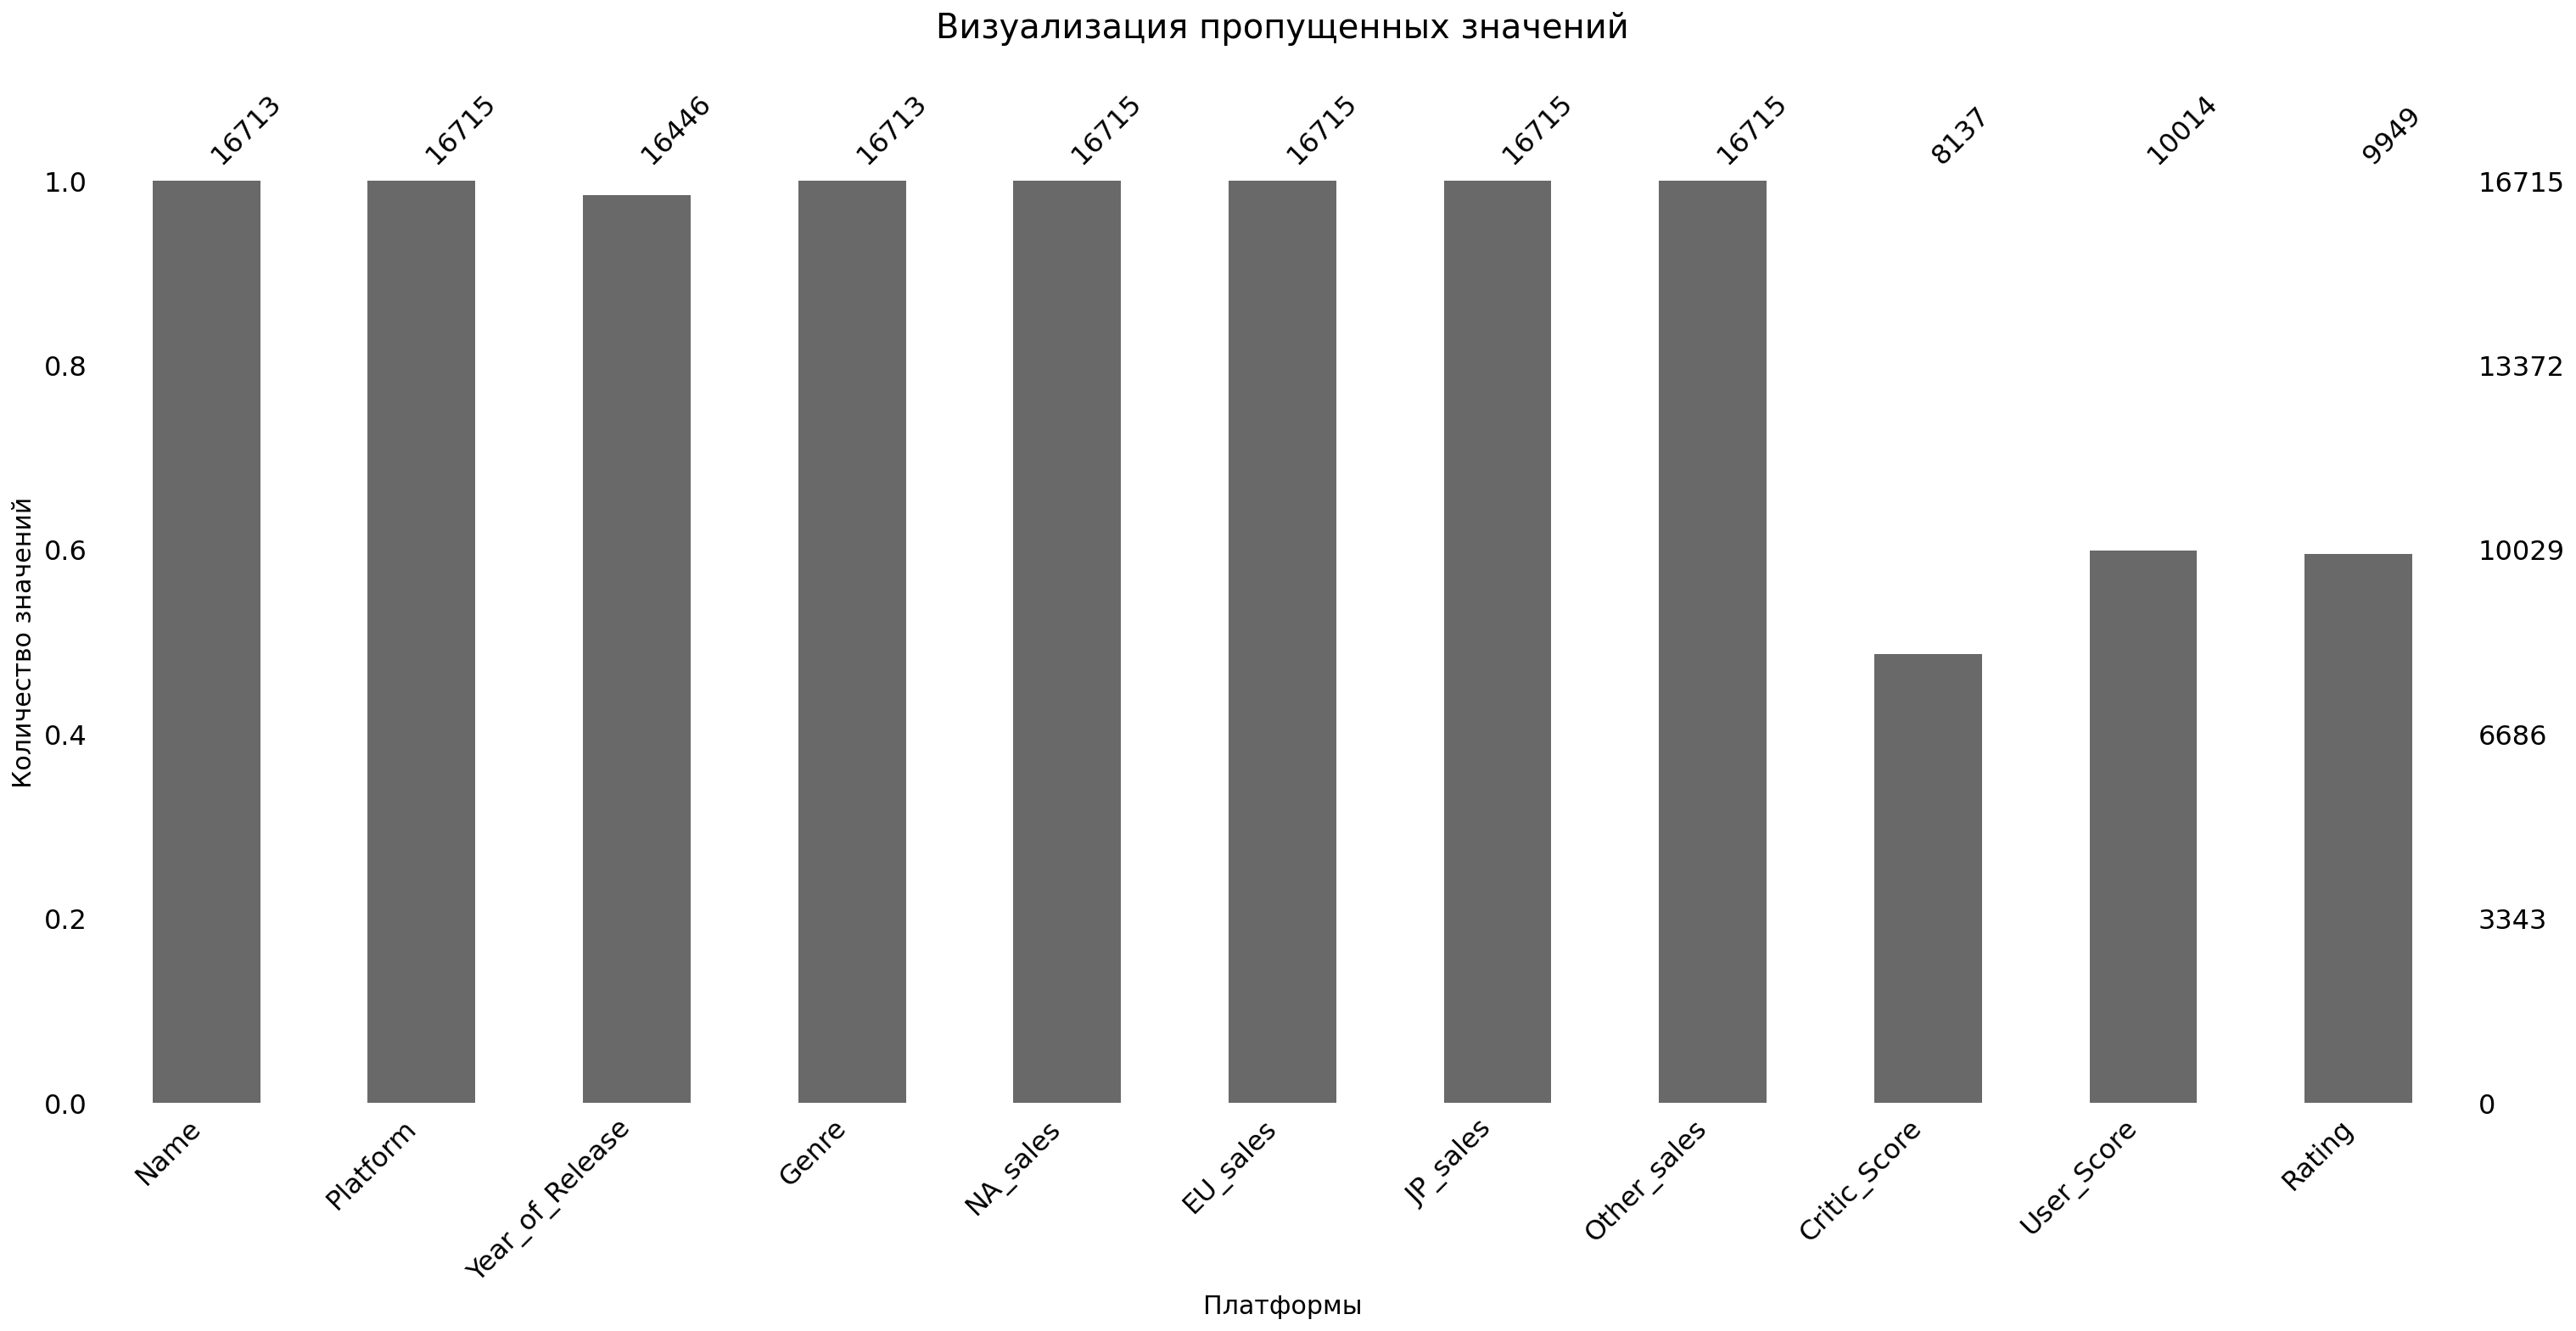

In [8]:

ax = msno.bar(data)

ax.set_title('Визуализация пропущенных значений', fontsize=20, pad=30)
ax.set_xlabel('Платформы', fontsize=15)
ax.set_ylabel('Количество значений', fontsize=15)
plt.show()

Некоторые столбцы неполные, что говорит о наличии пропусков.

In [9]:
# выведем количественные данные пропусков по столбцам:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16446.0,2006.484616,5.877050,1980.0,2003.0,2007.00,2010.00,2016.00
NA_sales,16715.0,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
EU_sales,16715.0,0.145060,0.503339,0.0,0.0,0.02,0.11,28.96
JP_sales,16715.0,0.077617,0.308853,0.0,0.0,0.00,0.04,10.22
Other_sales,16715.0,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
Critic_Score,8137.0,68.967679,13.938165,13.0,60.0,71.00,79.00,98.00


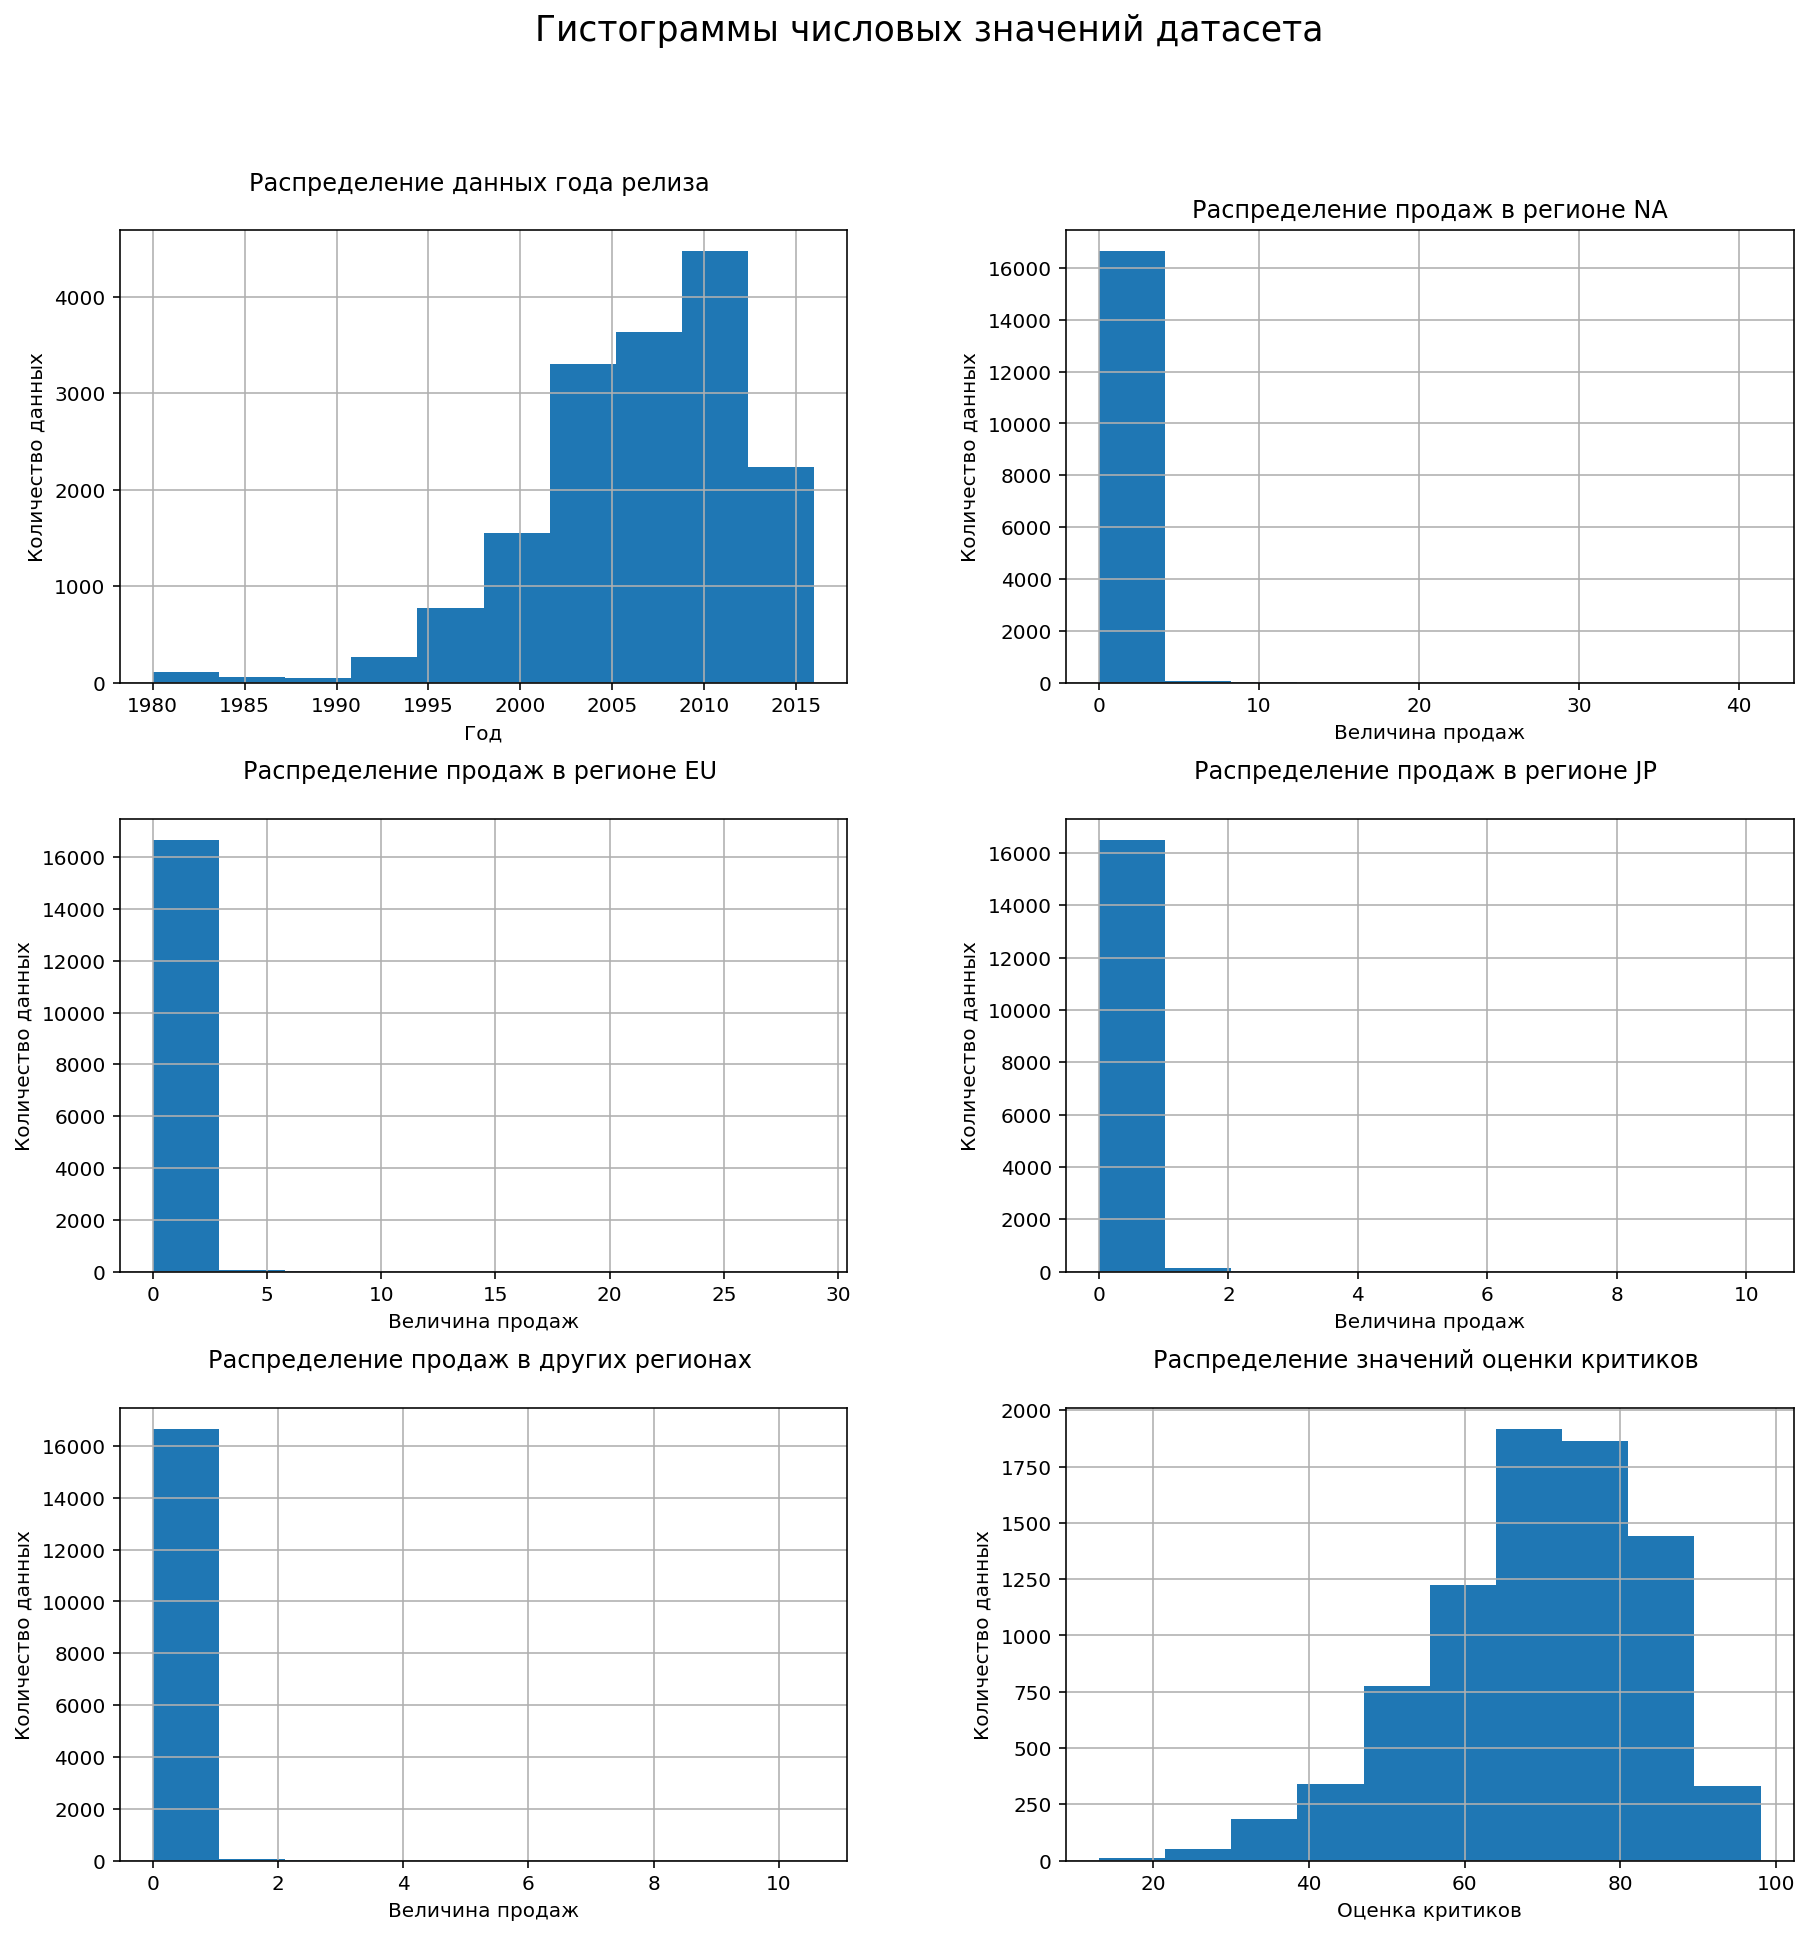

In [10]:
# выведем статистические параметры данных:
display(data.describe().T)
print( )
# выведем графики распределения количества:
axes = data.hist(figsize=(15, 15))
# подпишем графики распределения количества данных:
axes[0,0].set_title('Распределение данных года релиза \n')
axes[0,0].set_xlabel('Год')
axes[0,0].set_ylabel('Количество данных')

axes[0,1].set_title('Распределение продаж в регионе NA')
axes[0,1].set_xlabel('Величина продаж')
axes[0,1].set_ylabel('Количество данных')

axes[1,0].set_title('Распределение продаж в регионе EU \n')
axes[1,0].set_xlabel('Величина продаж')
axes[1,0].set_ylabel('Количество данных')

axes[1,1].set_title('Распределение продаж в регионе JP \n')
axes[1,1].set_xlabel('Величина продаж')
axes[1,1].set_ylabel('Количество данных')

axes[2,0].set_title('Распределение продаж в других регионах \n')
axes[2,0].set_xlabel('Величина продаж')
axes[2,0].set_ylabel('Количество данных')

axes[2,1].set_title('Распределение значений оценки критиков \n')
axes[2,1].set_xlabel('Оценка критиков')
axes[2,1].set_ylabel('Количество данных')


plt.suptitle('Гистограммы числовых значений датасета', ha='center', fontsize='xx-large')
plt.show()


**Выводы**

- Данные состоят из 16715 строк, соответтствующих названиям игр, и 11 столбцов с характеристиками. 
- Данные содержат ошибки в написании столбцов, которые нобходимо исправить.
- Типы данных не ссответстсвуют содержимому в столбцах даты релиза и ценки пользователей. Необходимо изменить тип данных даты релиза на datetime/ столбца с оценкой пользователей на int и облегчить вес файла за счет изменеия численного типа с float(64) на  float(32).
- Данные содержат пропуски в столбцах названия, года релиза, жанра, оценок критиков и пользователей и рейтинга ESRB. Необходимо проверить пропуски на возможность заполнения или исключения из данных.
- Данные продаж предположительно содержат экстреммумы и выбросы.

## Предварительная обработка данных

### Изменение названия столбцов

In [11]:
# приведём все записи к нижнему регистру:
data.columns = map(str.lower, data.columns)

In [12]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Заполнение пропусков

Изменить неудобный тип данных не получится из-за наличия большого количества пропусков. Сперва стоит избавиться от них.

Создадим функцию, которая поможет обнаружить и рассмотреть пропуски и их количество в каждом столбце

In [13]:
def miss(column):
    display(data[data[column].isna()])
    print('Количество пропусков - ', len(data[data[column].isna()]))
    print('Доля пропусков составляет', round(len(data[data[column].isna()])*100/len(data), 2), '%')
    

- Рассмотрим пропуски в столбце с названиями игр

In [14]:
miss('name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Количество пропусков -  2
Доля пропусков составляет 0.01 %


Две игры без названия, доля которых составляет 0,01% общей базы, имеют много пропусков и в других в характеристиках, а так же были выпущены в 1993 году, что делает их весьма устаревшими. Пропуски могли появиться из-за очень давних сведений и сбора данных из разных источников. Эти строки также являются единственными с пропусками в стобце жанра. Их удаление сделает обработку данных проще.

In [15]:
data = data.dropna(subset = ['name'])

- Рассмотрим пропуски данных в дате выхода игры

In [16]:
miss('year_of_release')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Количество пропусков -  269
Доля пропусков составляет 1.61 %


In [17]:
# проверим данные на ошибки заполнения:
data['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

Ошибок в написании года релиза нет, но пропусков замечено 269. В названиях некоторых игр можно заметить год выпуска. Найдем и перенесём их в данные, чтобы заполнить все возможные пропуски, так как использовать внешнюю информацию для такого количества не представляется возможным.

In [18]:
# сделаем копию данных с пропусками в годе релиза:
df = data[data['year_of_release'].isna()]
# сделаем список лет, возможных для релиза:
list = ['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', 
        '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016']

# создадим пустой спиок для названий с присутствием года:
list_name = []
# заполним спиок названиями, которые содержат год релиза:
for i in df['name']:
    if i[-4:] in list:
        list_name.append(i)

In [19]:
# ознакомимся с полученными названиями:
list_name

['Madden NFL 2004',
 'FIFA Soccer 2004',
 'wwe Smackdown vs. Raw 2006',
 'NASCAR Thunder 2003',
 'Madden NFL 2002',
 'NFL GameDay 2003',
 'NBA Live 2003',
 'All-Star Baseball 2005',
 'NBA Live 2003',
 'All-Star Baseball 2005',
 'Tour de France 2011',
 'Sega Rally 2006',
 'PDC World Championship Darts 2008',
 'Football Manager 2007',
 'PDC World Championship Darts 2008']

Год релиза в названиях удачно расположен в конце, что позволит его перенести в нужный столбец.

In [20]:
# заполним год релиза для найденных названий в общих данных:
for i, row in data.iterrows():
    if data['name'][i] in list_name:
        data['year_of_release'][i] = data['name'][i][-4:]

/tmp/ipykernel_387/1871846675.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year_of_release'][i] = data['name'][i][-4:]


In [21]:
# проверим заполнение:
data['year_of_release'][183]

2004.0

In [22]:
# оценим пропуски в столбце года релиза после заполнения из названий:
miss('year_of_release')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
...,...,...,...,...,...,...,...,...,...,...,...
16348,Agarest Senki: Re-appearance,PS3,NaN,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Количество пропусков -  254
Доля пропусков составляет 1.52 %


Количество пропусков уменьшилось на 15 игр и теперь составляет чуть больше 1,5%. От такого количества данных можно избавиться, тем более, что многие из них имеют пропуски в рейтинге и оценках, а доля выручки этих игр не велика.

In [23]:
data = data.dropna(subset = ['year_of_release'])

- Рассмотрим пропуски в оценках критиков и пользователей. Незаполненность этих прараметров могла сложиться из-за разрозненности источников и отсутствия данных (на некоторые старые или непопулярные игры может не быть отзывов и оценок).

In [24]:
miss('critic_score')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Количество пропусков -  8465
Доля пропусков составляет 51.43 %


In [25]:
# проверим данные на ошибки заполнения:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

Ошибок написания оценки критиков нет, но доля пропусков составляет 51,43%. Удаление такого существенного количества данных может привести к искажениям характеристик и зависимостей. Лучшим вариантом станет значение-заглушка, которое легко отделить от данных при подробном исследовании этого столбца, но его наличие позволит исключить появление програмных ошибок при проведении исследовательского анализа.

In [26]:
data['critic_score'] = data['critic_score'].fillna(-1)
data['critic_score'].unique()

array([76., -1., 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [27]:
miss('user_score')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,-1.0,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-1.0,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,-1.0,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,-1.0,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,-1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,-1.0,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,-1.0,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,-1.0,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,-1.0,NaN,NaN


Количество пропусков -  6609
Доля пропусков составляет 40.15 %


In [28]:
# проверим данные на ошибки заполнения:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Значение 'tbd' (To be determined) расшифровывается как "подлежит определению", что в случае обработки данных означает NaN. 
Количество пропусков в этом столбце тоже существенно и составляет 40,15%. Удаление такого объема данных нецелесообразно.
Заменим 'tbd' и  пропущенные значения на значение-заглушку (-1), которое не трудно будет отсечь и которое не помешает исследованию.

In [29]:
data.loc[data['user_score']=='tbd', 'user_score'] = -1
data['user_score'] = data['user_score'].fillna(-1)

- Рассмотрим прпуски и значения в возрастном рейтинге от  ESRB (Entertainment Software Rating Board)

In [30]:
miss('rating')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,-1.0,-1,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,-1.0,-1,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,-1.0,-1,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,-1.0,-1,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,-1.0,-1,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,-1.0,-1,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,-1.0,-1,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,-1.0,-1,NaN


Количество пропусков -  6681
Доля пропусков составляет 40.59 %


In [31]:
# рассмотрим количество и написание обозначений рейтинга:
data['rating'].value_counts()

E       3930
T       2905
M       1536
E10+    1394
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

Возрастные рейтинги видеоигр, согласно системе ESRB (Совет по рейтингу развлекательного программного обеспечения):

EC — для детей младшего возраста (от 3 лет);

E — для всех возрастных категорий;

E 10+ — для лиц старше 10 лет;

T — для лиц старше 13 лет;

M — для лиц старше 17 лет;

AO — для взрослых старше 18 лет;

RP — категория ещё не присвоена.

Исходя из категорий, в качестве заглушки можно использовать RP (категория не определена). 
В 1998 году рейтинг K-A был переименован в Е — для всех возрастов, поэтому необходимо изменить обозначение этой категории.

In [32]:
data.loc[data['rating']=='K-A', 'rating'] = 'E'
#data['rating'] = data['rating'].fillna('RP')
data['rating'] = data['rating'].fillna('unknown')

Проверим, как выглядит теперь информация об играх:

In [33]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,-1.0,-1,unknown
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1,unknown


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16459 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16459 non-null  object 
 1   platform         16459 non-null  object 
 2   year_of_release  16459 non-null  float64
 3   genre            16459 non-null  object 
 4   na_sales         16459 non-null  float64
 5   eu_sales         16459 non-null  float64
 6   jp_sales         16459 non-null  float64
 7   other_sales      16459 non-null  float64
 8   critic_score     16459 non-null  float64
 9   user_score       16459 non-null  object 
 10  rating           16459 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [35]:
print('Пропусков в таблице более нет, потери составили:', round(100*(16715-len(data))/len(data), 2), '%')

Пропусков в таблице более нет, потери составили: 1.56 %


Отсутствие пропусков позволит изменить типы данных на удобные для работы.

**Вывод**

- Данные с пропусками названий составили 0,01% и были удалены.
- Пропуски года релиза были частично заполнены из названий, оставшиеся 1,52% были удалены.
- Пропуски оценок критиков и оценок пользователей, в том числе значение 'tbd', были заменены значением-заглушкой.
- Причинами возникновения пропусков могло стать использование множества разрозненных источников, отсутствие данных в связи с давностью и непопулярностью игры или техническими ошибками при формировании базы данных.

### Изменение типа данных


Столбец с годом выпуска игры можно перевести в тип int, чтобы на графиках были лаконичные цифры.

Столбец с рейтингом пользователей после удаления пропусков можно перевести в численный тип. 

In [36]:
data['year_of_release'] = data['year_of_release'].astype('int32')
data['user_score'] = data['user_score'].astype('float')

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16459 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16459 non-null  object 
 1   platform         16459 non-null  object 
 2   year_of_release  16459 non-null  int32  
 3   genre            16459 non-null  object 
 4   na_sales         16459 non-null  float64
 5   eu_sales         16459 non-null  float64
 6   jp_sales         16459 non-null  float64
 7   other_sales      16459 non-null  float64
 8   critic_score     16459 non-null  float64
 9   user_score       16459 non-null  float64
 10  rating           16459 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB


### Создание новых столбцов

Для удобства общей оценки мировых продаж игры создадим новый столбец с общим значением количества проданных копий по всем регионам.

In [38]:
# Просуммируем данные отдельных регионов в новый столбец:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
# Переместим стобец к данным о продажах:
data = data[['name', 'platform', 'year_of_release', 'genre', 
             'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales', 
             'critic_score', 'user_score', 'rating']]

In [39]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,82.54,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,40.24,-1.0,-1.0,unknown
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,35.52,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,32.77,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,31.38,-1.0,-1.0,unknown


**Выводы**

- Изначальное написание названий столбцов не ссответстсвовало snake_case из-за написания с заглавной буквы, что было исправлено приведением всех названий к нижнему регистру.
- Данные с пропусками названий игр составили 0,01% и были удалены. 
- Пропуски года релиза были частично заполнены из названий, оставшиеся 1,52% были удалены.
- Пропуски оценок критиков и оценок пользователей, в том числе значение 'tbd', были заменены значением-заглушкой.
- Столбцы с годом выпуска игры и рейтингом пользователей были переведены в тип int.
- В таблицу добавлен столбец суммарного значения продаж по всем регионам от каждой игры.

In [40]:
# Комментарий ревьюера
# Посмотрим, что осталось
temp = data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%') 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16459 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16459 non-null  object 
 1   platform         16459 non-null  object 
 2   year_of_release  16459 non-null  int32  
 3   genre            16459 non-null  object 
 4   na_sales         16459 non-null  float64
 5   eu_sales         16459 non-null  float64
 6   jp_sales         16459 non-null  float64
 7   other_sales      16459 non-null  float64
 8   total_sales      16459 non-null  float64
 9   critic_score     16459 non-null  float64
 10  user_score       16459 non-null  float64
 11  rating           16459 non-null  object 
dtypes: float64(7), int32(1), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio: Instant Artist' 'wwe Smackdown vs. Raw 2006'
 '¡Shin Chan Flipa e

### Проверка на дубликаты

In [41]:
# проверим данные на наличие очевидных дубликатов:
data.duplicated().sum()

0

Очевидных дубликатов нет. Преверять на скрытые дубликаты необходимо с учётом названия и платформы, так как игры в большинстве случает выпускаются для всех топовых платформ на момент релиза. Кроме того имеет смысл включить в проверку год релиза, так как игра могла перевыпускаться под тем же названием на той же платформе.

In [42]:
display(data[data[['name', 'platform', 'year_of_release']].duplicated()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
16230,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.0,0.0,0.01,83.0,5.5,E


In [43]:
display(data[(data['name']=='Madden NFL 13')&(data['platform'] == 'PS3')])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,2.56,83.0,5.5,E
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,0.01,83.0,5.5,E


По данным внешних источников в европейском регионе игра вышла дважды: в апреле 2012 по предзаказу и в момент мировго релиза в августе 2012. Предзаказ в европейском регионе очевидно попал в отдельную запись под и может быть удалён. Данные количества продаж в европейском регионе следует скорректировать, дабы не терять информацию.

In [44]:
# перепишем данные европейских продаж:
data['eu_sales'].loc[(data['name']=='Madden NFL 13')&(data['platform'] == 'PS3')] = 0.23
# удалим дубликат:
data = data.drop_duplicates(subset=['name', 'platform', 'year_of_release'])

Для полноты проверки удостоверимся, что в названиях платформ и жанров нет ошибок написания.

In [45]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [46]:
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

**Выводы:**

- данные не содержали очевидные дубликаты;
- в ходе проверки совместной названий, платформ и года релиза был выявлен и удалён скрытый дубликат, скорее всего вызванный предзаказом;
- данные всех столбцов проверены правильность написания, ошибок не выявлено.

## Исследовательский анализ данных

Рассмотрим информацию в каждом столбце-параметре на наличие ошибок и выбросов, оценим качество данных.

### Оценка объемов выпуска игр по годам

In [47]:
# создадим сводную таблицу с количеством проданных копий игр по годам:
year_counts = (data.pivot_table(index='year_of_release', 
                               values='total_sales', 
                               aggfunc=['sum', 'count'])
                   .reset_index()
              )
# переименуем столбцы для удобства:
year_counts.columns = ['year_of_release', 'total_sales', 'count_games']
# ознакомимся с таблицей:
year_counts

,year_of_release,total_sales,count_games
0,1980,11.38,9
1,1981,35.68,46
2,1982,28.88,36
3,1983,16.80,17
4,1984,50.35,14
5,1985,53.95,14
6,1986,37.08,21
7,1987,21.70,16
8,1988,47.21,15
9,1989,73.45,17


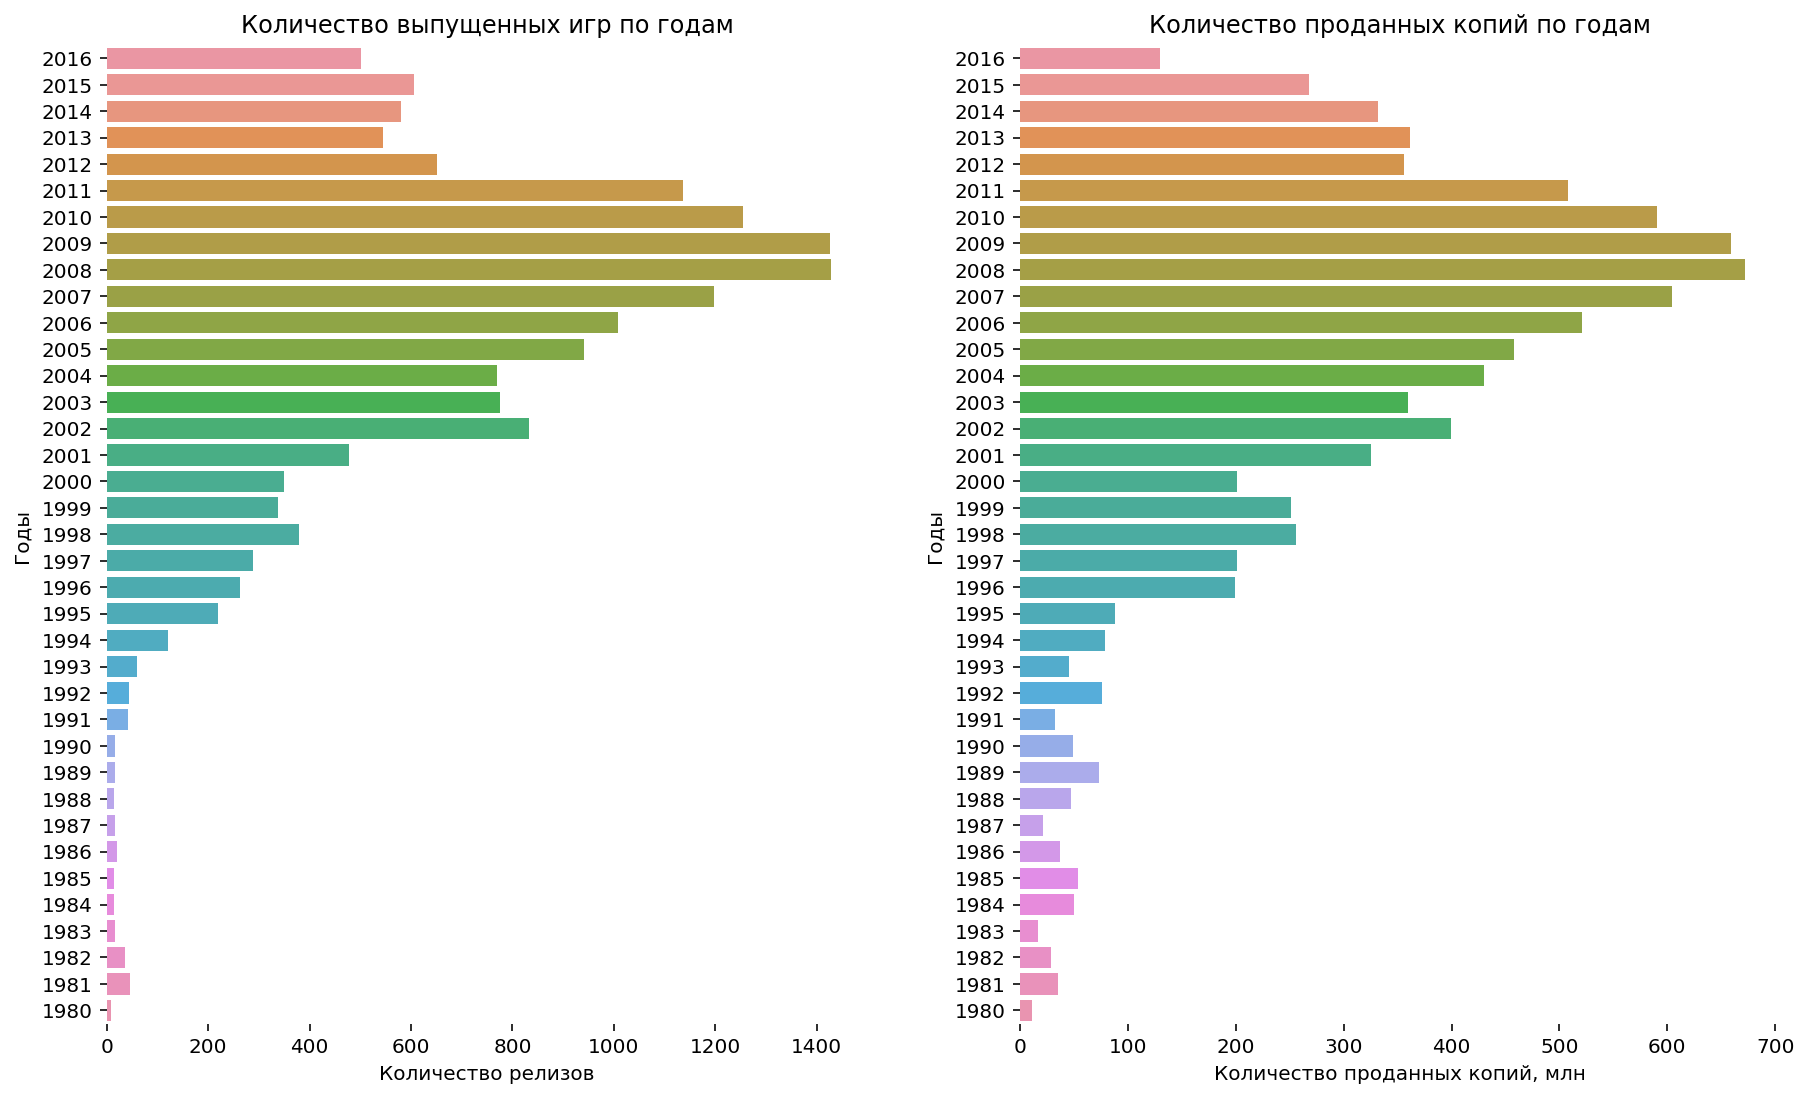

In [48]:
# зададим размер общей фигуры:
fig = plt.figure(figsize=(15,9))
# построим столбчатую диаграмму изменения количества проданных копий по годам:
ax2 = fig.add_subplot(122)
ax2 = (sns.barplot(data = year_counts, 
             x = 'total_sales',
             y = 'year_of_release', 
             order = year_counts['year_of_release'].sort_values(ascending=False),
             orient="h")
    .set(title = 'Количество проданных копий по годам', 
         xlabel = 'Количество проданных копий, млн', 
         ylabel = 'Годы ')
)

# построим столбчатую диаграмму изменения количества выпущенных игр по годам:
ax2 = fig.add_subplot(121)
ax2 = (sns.barplot(data = year_counts, 
             x = 'count_games',
             y = 'year_of_release', 
             order = year_counts['year_of_release'].sort_values(ascending=False),
             orient="h")
    .set(title = 'Количество выпущенных игр по годам', 
         xlabel = 'Количество релизов', 
         ylabel = 'Годы ')
)
sns.despine(left=True, bottom=True) # уберем линии границ графика
plt.show()

Временной интервал исследуемых данных - с 1980 года по 2016 год.

До 1995 года игр выпускалось не много, но их количество проданных копий было существенным. С 1995 и по 2008 годы наблюдается скачкообразный рост количества выпускаемых игр и реализованных копий. 2008 и 2009 годы стали наиболее насыщены релизами и распространением, после чего в течение двух наблюдается плавный спад. Резкое падение количества предлагаемых новинок и соответствующий спад проданных копий приходится на 2012 год, за которым следует колебание рынка: в 2013, 2014 и 2015 количество новых игр медленно росло, но в 2016 снова упало даже ниже показателей 2002 года.

Колебание количества проданных в мире копий в целом аналогично колебанию количества релизов, однако стоит отметить, что при увеличении количества игр с 2013 по 2014 распространение продолжало плавно снижаться и в 2016 году опустилась ниже уровня 1996 года. Возможно это говорит о неполных данных за 2016 год.

### Продажи игр на разных платформах

In [49]:
#сгруппируем сводную таблицу количества релизов и распространённых копий от игр на разных платформах:
platform_analyse = data.pivot_table(index='platform', 
                                    values='total_sales', 
                                    aggfunc=['sum', 'count']
)
# переименуем столбцы для удобства:
platform_analyse.columns = ['total_sales', 'count_sales']
# ознакомимся с таблицей:
platform_analyse

,total_sales,count_sales
platform,,
2600,86.48,116
3DO,0.10,3
3DS,257.81,512
DC,15.95,52
DS,802.79,2122
GB,254.43,97
GBA,312.88,811
GC,197.03,543
GEN,28.35,27


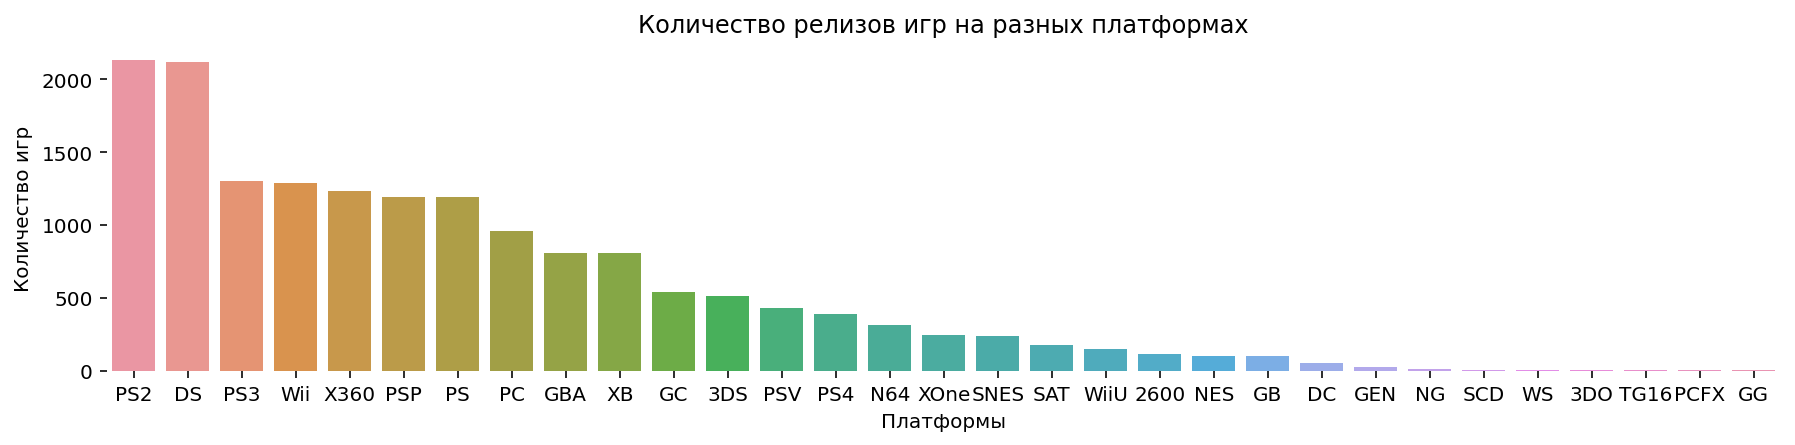

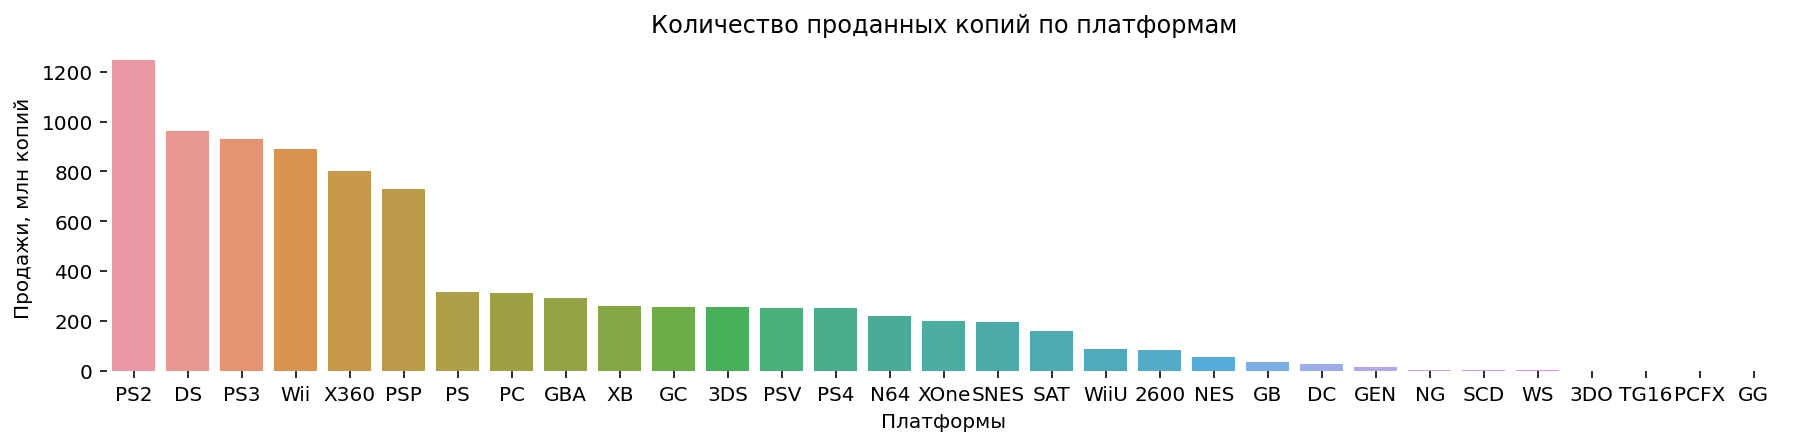

In [50]:
# построим столбчатую диаграмму количества релизов игр на разных платформах с сортировкой по убыванию:
plt.figure(figsize=(15, 3))
(sns.barplot(data = platform_analyse.sort_values(by='count_sales', ascending=False), 
             x = platform_analyse.sort_values(by='count_sales', ascending=False).index, 
             y = 'count_sales')
    .set(title = 'Количество релизов игр на разных платформах', 
         xlabel = 'Платформы', 
         ylabel = 'Количество игр')
)
sns.despine(left=True, bottom=True) # уберем линии границ графика
plt.show()

# построим столбчатую диаграмму общего количества проданных копий на разных платформах с сортировкой по убыванию:
plt.figure(figsize=(15, 3))
(sns.barplot(data = platform_analyse.sort_values(by='total_sales', ascending=False), 
             x = platform_analyse.sort_values(by='count_sales', ascending=False).index, 
             y = 'total_sales')
    .set(title = 'Количество проданных копий по платформам', 
         xlabel = 'Платформы', 
         ylabel = 'Продажи, млн копий')
)
sns.despine(left=True, bottom=True) # уберем линии границ графика
plt.show()

Наибольшие активность и доходность можно отметить у шести платформ. Однако следует более детально рассмотреть время жизни платформ, так как новые и недавно появившиеся игровые платформы могли еще не набрать силу. Рассмотрим, сколько лет и как активно выпускались игры для разных платформ с помощю тепловой карты, поставив количество выпускаемых игр как показатель активности.

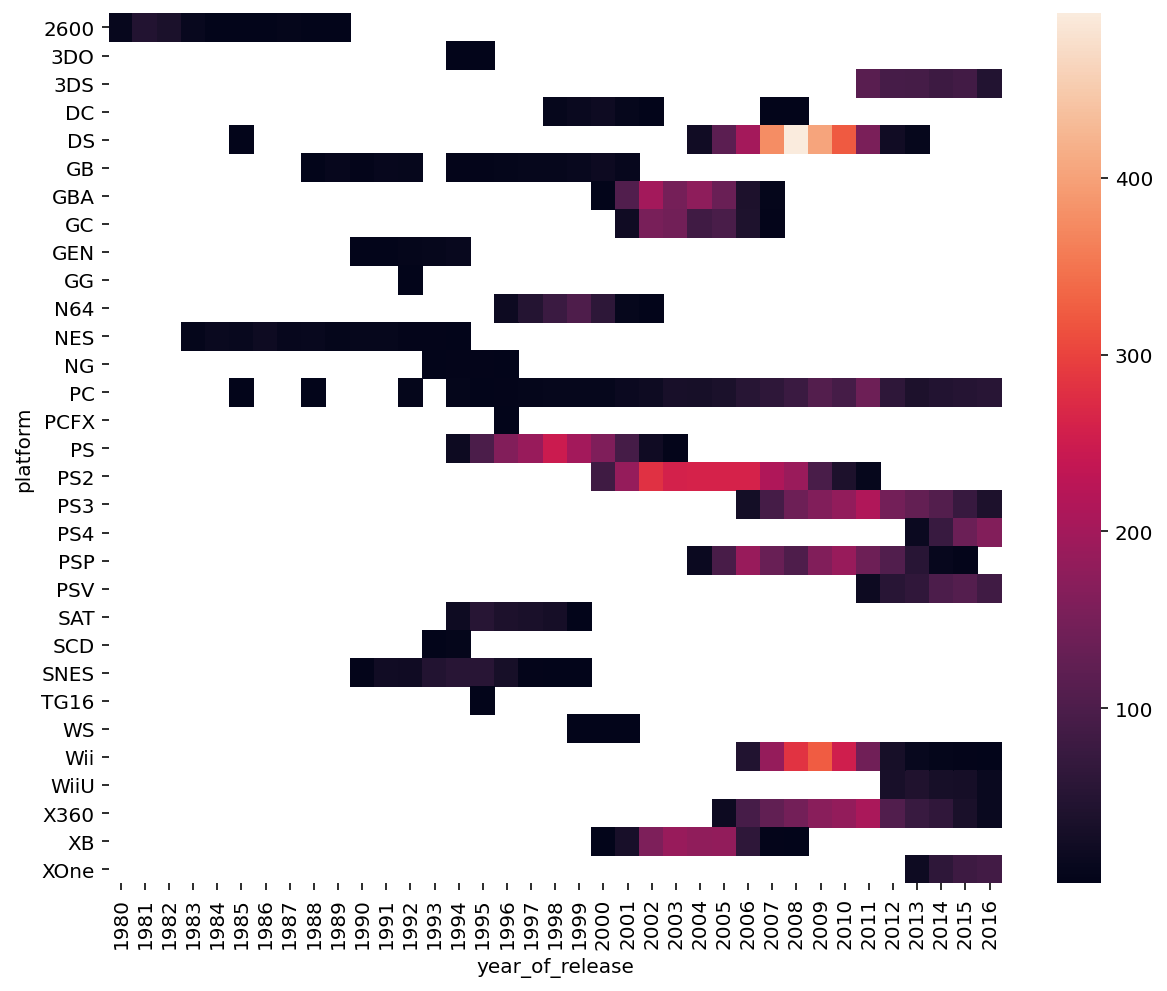

In [51]:
# соберём данные о количестве игр по годам для каждой консоли:
count_in_platform_pro_year = data.pivot_table(values='name',
                                                index='platform', 
                                                columns='year_of_release',
                                                aggfunc='count'
)
# построим тепловую карту:
plt.figure(figsize=(10, 8))
sns.heatmap(count_in_platform_pro_year)
plt.show()

Тепловая карта хорошо показывает, что каждая игровая платформа имеет жизненный цикл в несколько лет. Во многих случаях от срока появления до ухода с рынка проходит около 10 лет. Исключением стала PC, так как этот способ игры позволяет обходиться без дополнительного оборудования (игровой приставки) и использует персональный компьютер, в большинстве случаев присутствующий в личном пользовании потенциальными игроками. 

В данных о платформах 'DS' и 'PC' заметны единичные выбросы по годам. Это могут быть ошибочные даты релизов (релиз игры для платформы 'DS' раньше выпуска самой платформы) или очень старые данные (игры для компьютера могут иметь такие даты). Их следует проверить.

In [52]:
display(data[(data['platform']=='DS')&(data['year_of_release']<2004)])
display(data[(data['platform']=='PC')&(data['year_of_release']<1994)])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,0.02,-1.0,-1.0,unknown


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
769,SimCity 2000,PC,1992,Simulation,1.20,0.84,0.0,0.10,2.14,-1.0,-1.0,unknown
2612,The 7th Guest,PC,1992,Adventure,0.02,0.77,0.0,0.00,0.79,-1.0,-1.0,T
12650,Syndicate,PC,1992,Strategy,0.00,0.05,0.0,0.01,0.06,-1.0,-1.0,unknown
14470,Alter Ego,PC,1985,Simulation,0.00,0.03,0.0,0.01,0.04,59.0,5.8,T
14610,Doom,PC,1992,Shooter,0.02,0.00,0.0,0.00,0.02,85.0,8.2,M
14621,SimCity,PC,1988,Simulation,0.00,0.02,0.0,0.01,0.03,64.0,2.2,E10+
15692,Empire Deluxe,PC,1992,Strategy,0.02,0.00,0.0,0.00,0.02,-1.0,-1.0,unknown


Согласно интеренет-источникам игра 'Strongest Tokyo University Shogi DS' вышла на платформе 7 мая 2010 года, поэтому год релиза в данных следует изменить.
При проверке релизов игр для PC, вышедших до 1994 года выяснилось, что в некоторых год ошибочно занижен на 1992 (при официальной дате релиза 1993), но изменять это не обязательно, так как эти игры можно считать устаревшими и для большинства из них уже есть либо продолжение серии, либо обновлённые версии для актуальных платформ.

In [53]:
# изменим год релиза игры:
data.loc[(data['name']=='Strongest Tokyo University Shogi DS')&(data['platform']=='DS'), 'year_of_release']=2010

Рассмотрим, сколько согласно статистическим параметрам в среднем живут платформы, имеющиеся в данных:

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,10,2,6,7,10,13,8,7,5,1,...,6,2,10,1,3,11,5,12,9,4


,count,mean,std,min,25%,50%,75%,max
year_of_release,31.0,7.645161,5.063256,1.0,4.0,7.0,10.5,26.0


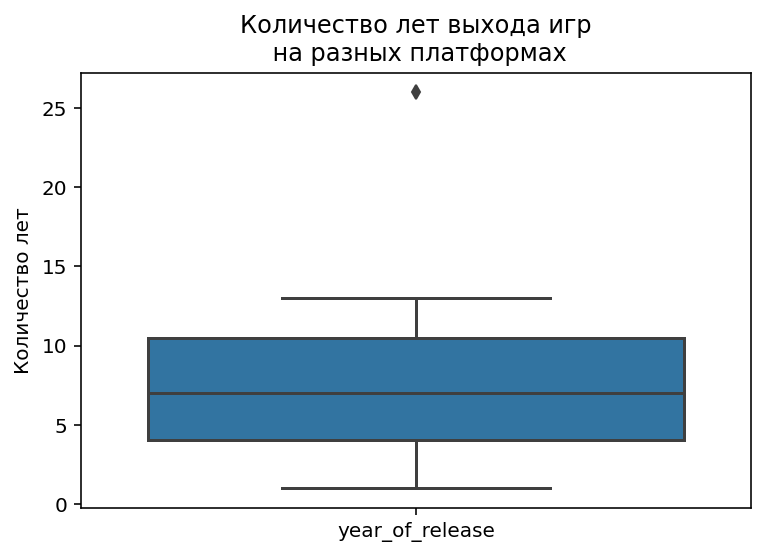

In [54]:
# сгруппируем данные по платформам и подсчитаем количество лет их существования на рынке:
lifetime_of_platform = data.pivot_table(index='platform',
                                        values='year_of_release',
                                        aggfunc='nunique'
)
# выведем таблицу:
display(lifetime_of_platform.T)
# выведем стстистические параметры lifetime платформ:
display(lifetime_of_platform.describe().T)
# визуализируем статистику общего lifetime платформ:
(sns.boxplot(data=lifetime_of_platform)
     .set(title = 'Количество лет выхода игр\n на разных платформах', 
          ylabel = 'Количество лет')
)
plt.show()

Основная часть имеющихся платформ существует на рынке игр 4-10 лет. Среднее значение чуть больше медианного, так как учитывает выброс в 26 лет для игр PC. 

Рассмотрим жизненный цикл наиболее прибыльных и активных платформ на данных о выручке.

In [55]:
# соберём топ-6 наиболее активных платформ в список:
top_name = platform_analyse.sort_values(by='count_sales', ascending=False).head(6).index
top_name

Index(['PS2', 'DS', 'PS3', 'Wii', 'X360', 'PSP'], dtype='object', name='platform')

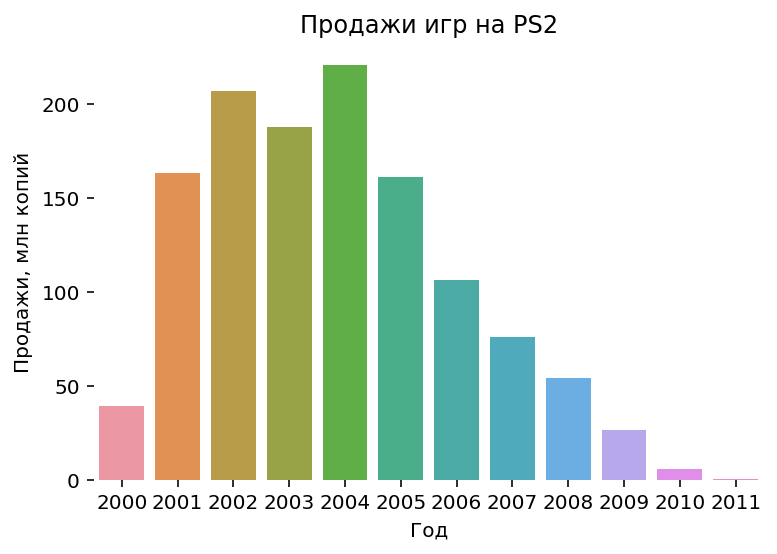

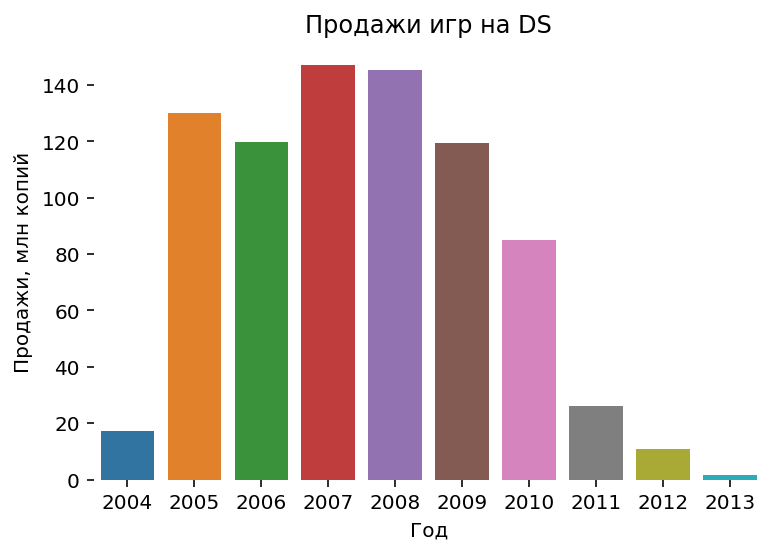

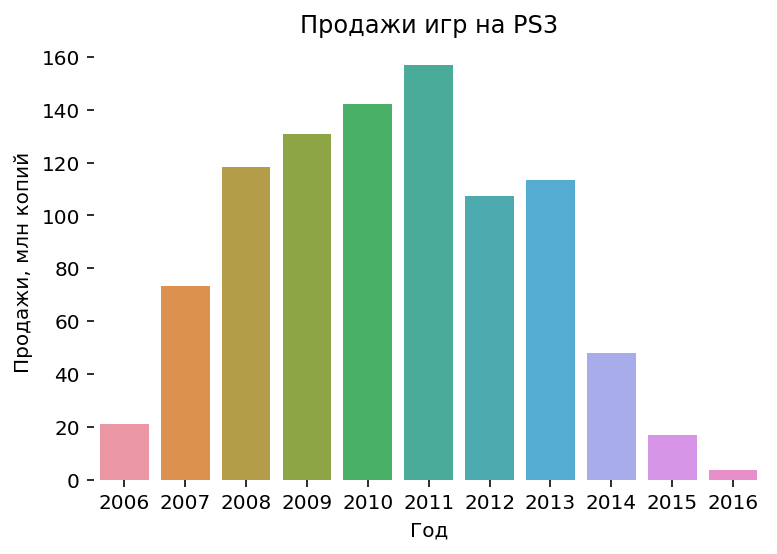

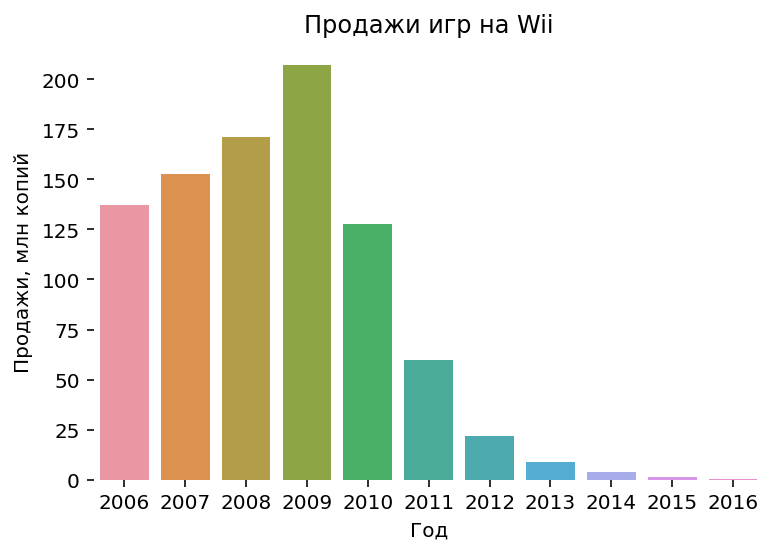

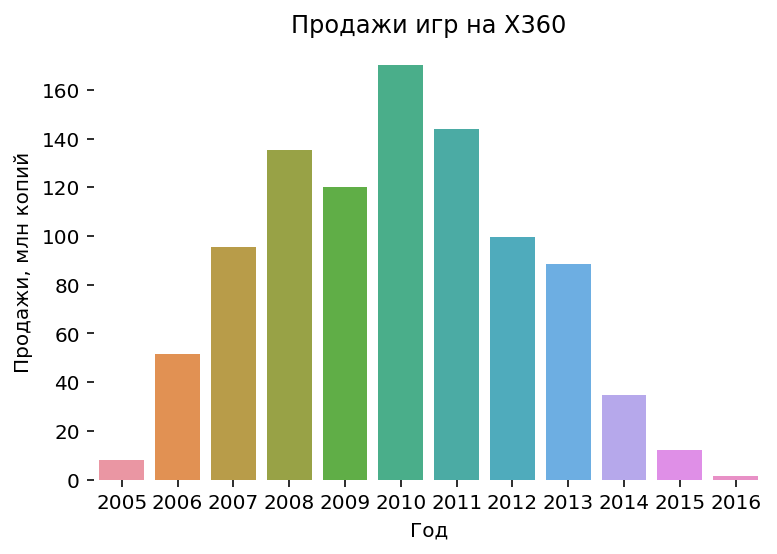

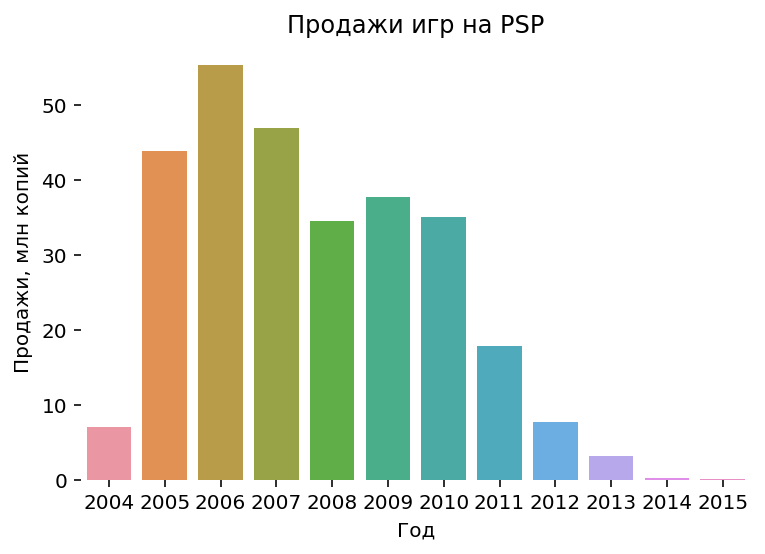

In [56]:
# визуализируем объёмы продаж по годам для каждой платформы из топ-списка:
for platform_name in top_name:
    platform_sales = pd.pivot_table(data.query('platform == @platform_name'), 
                                    index=['year_of_release'], 
                                    values='total_sales', 
                                    aggfunc='sum')
    (sns.barplot(data = platform_sales, 
                 x = platform_sales.index, 
                 y = 'total_sales')
        .set(title = ('Продажи игр на ' + platform_name), 
             xlabel = 'Год', 
             ylabel = 'Продажи, млн копий')
    )
    sns.despine(left=True, bottom=True) # уберем линии границ графика
    plt.show()

На старте платформа в первые 1-2 года завоёвывает рынок и наращивает продажи, в последующие 2-4 года наблюдается пик релизов и продаж, дальнейшие года показатели идут на убыль и к десятому году достигают меньших, чем на старте уровней. Дальнейшие годы, если они есть, продажи игр на консоль минимальны. Это подтверждает статистические показатели активности консолей до 10 лет.

Для выбора количества актуальных лет для исследования прогнозирования продаж на 2017 год стоит учесть резкое падение количества новых игр в 2012 году и среднее lifetime игровых консолей в 7 лет. Таким образом целесообразно отсечь данные старше 2012 года и проводить прогнозирование на интервале 4 полных лет (2012-2015гг) и 1 неполного (2016г).

In [58]:
# Проверим математически среднее время жизни платформы:
print('Среднее время жизни платформы на рынке %.2f лет' %temp.groupby('platform').agg({'year_of_release':'nunique'}).median())

Среднее время жизни платформы на рынке 7.00 лет


### Опреление потенциально прибыльных платформ

Из диаграммы выручки по платформам можно увидеть, что первые 6 прнесли  наибольшую прибыль. Возьмём их в качестве первого параметра. Однако, не стоит забывать, что молодые игровые платформы, которые недавно на рынке, могут быть не менее прибыльными в будущем, поэтому их следует оценить отдельно путём выделения актуальных платформ, которые на 2016 год приносят прибыль.

In [59]:
# выделим актуальные на текущий год платформы:
actual_name_platform = data[data['year_of_release'] == 2016]['platform'].unique()
actual_name_platform

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'PC', 'X360', 'PSV', 'Wii'],
      dtype=object)

In [60]:
# сформируем дата-базу актуальных платформ в установленном исследованием интервале лет:
analyse_data = data[data['year_of_release'] >= 2012]
analyse_platform = analyse_data[analyse_data['platform'].isin(actual_name_platform)]

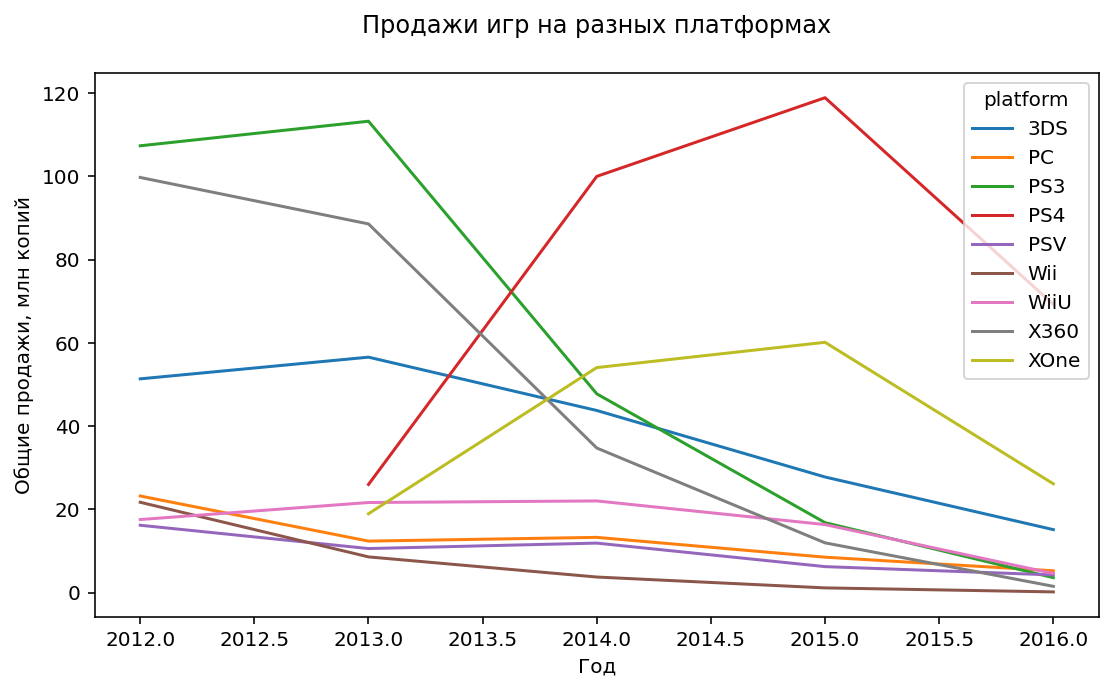

In [61]:
# сформируем свобную таблицу продаж по платформам за каждый исследуемый год:
current_period_sales = pd.pivot_table(analyse_platform, 
                                      index=['platform','year_of_release'], 
                                      values='total_sales', 
                                      aggfunc = 'sum')
# визуализируем полученные данные:
plt.figure(figsize=(9, 5))
(sns.lineplot(x='year_of_release',
              y='total_sales', 
              hue='platform', 
              data=current_period_sales)
     .set(title = 'Продажи игр на разных платформах\n', 
          xlabel = 'Год', 
          ylabel='Общие продажи, млн копий')
)
plt.show()

- Почти у всех консолей продажи падают после 2014 года, кроме XOne и PS4, у которых падение наступает в 2015 году.
- Лидером продаж PS4 на 2016 год остается PS4, хотя в предверии выпуска нового поколения консоли производителя продажи падают. Также и XOne, занимающая второе место по количеству распространённых копий, теряет объем продаж, но активно вытесняет уходящую с рынка X360.
- 3DS от Nintendo также можно считать перспективной, так как она имеет третье место по продажам за актуальный период. Среди портативных консолей она уверенно обходит конкурентов: PSV и WiiU имееют в два раза меньшие продажи и кажутся менее перспективными. 
- Продажи на консолях PS3, X360, Wii в конце актуального периода снизились до минимума. По тепловой карте можно заметить, что данные консоли уже не актуальны, их жизненный цикл завершается и они активно вытесняются более новыми представителями своих производителей.
- Количество продаж игр на PC имеет низкие показатели, однако не минимальные. Эта платформа кажется всегда актуальной, так как имеет значительно больший охват, нежели отдельные игровые платформы.

Проверим сделанные выводы с помощью боксплотов по каждой выбранной платформе.

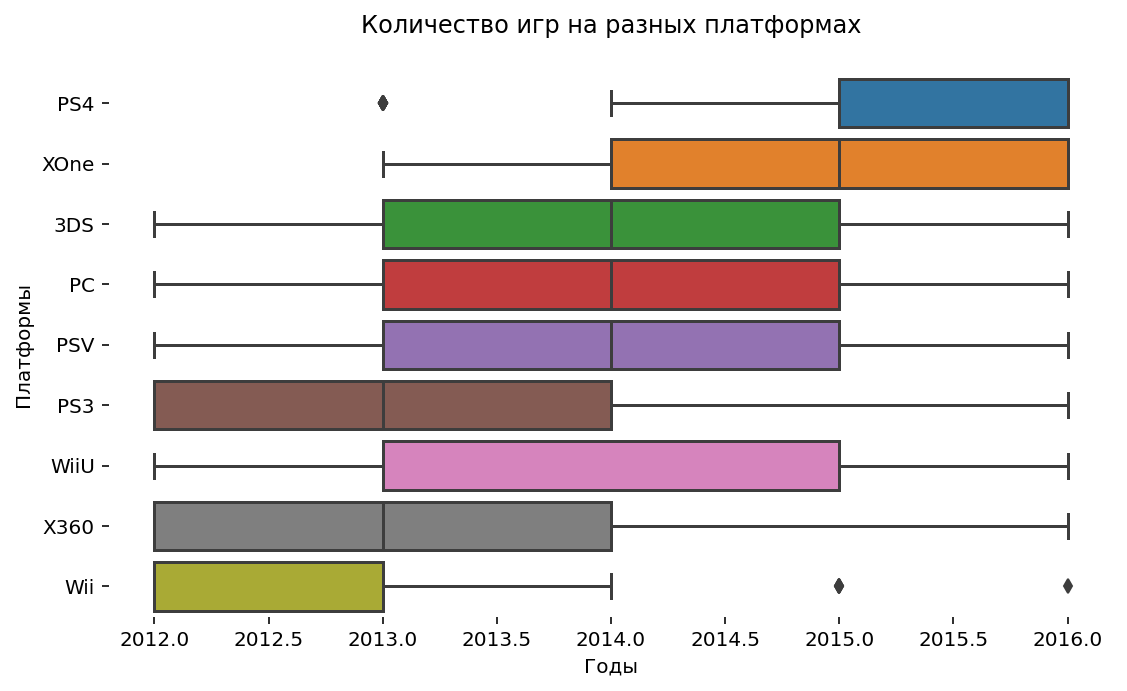

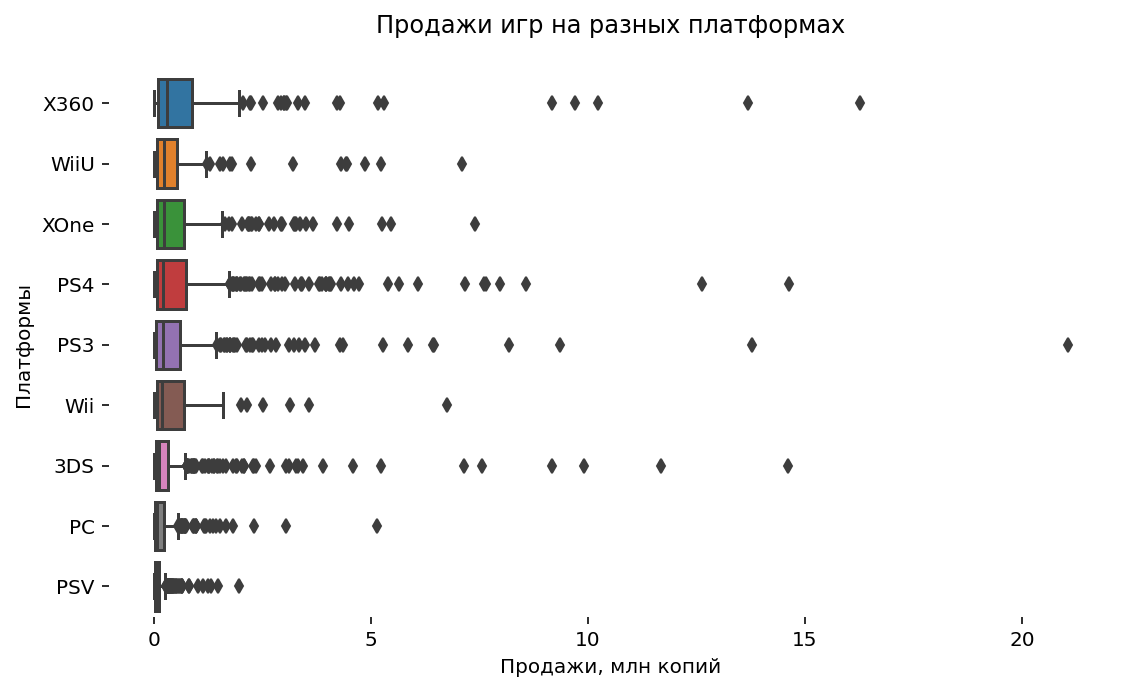

In [62]:
# построим серию боксплотов для проверки объема выпускаемых игр:
plt.figure(figsize=(9, 5))
# зададим сортировку по убыванию медианного значения:
order = (analyse_platform.groupby('platform')['year_of_release']
                    .agg('median')
                    .sort_values(ascending=False)
                    .index
)
(sns.boxplot(data=analyse_platform, 
             y='platform', 
             x=data['year_of_release'],
             order=order
)
     .set(title = 'Количество игр на разных платформах\n', 
          ylabel = 'Платформы', 
          xlabel='Годы')
)
sns.despine(left=True, bottom=True)
plt.show()

# построим серию боксплотов для рассмотрения статистики по объёму продаж: 
plt.figure(figsize=(9, 5))
# зададим сортировку по убыванию медианного значения:
order = (analyse_platform.groupby('platform')['total_sales']
                                                         .agg('median')
                                                         .sort_values(ascending=False)
                                                         .index
)
(sns.boxplot(data=analyse_data, 
             y='platform', 
             x=data['total_sales'],
             order=order)
     .set(title = 'Продажи игр на разных платформах\n', 
          ylabel = 'Платформы', 
          xlabel='Продажи, млн копий')
)
sns.despine(left=True, bottom=True) # уберем линии границ графика
plt.show()


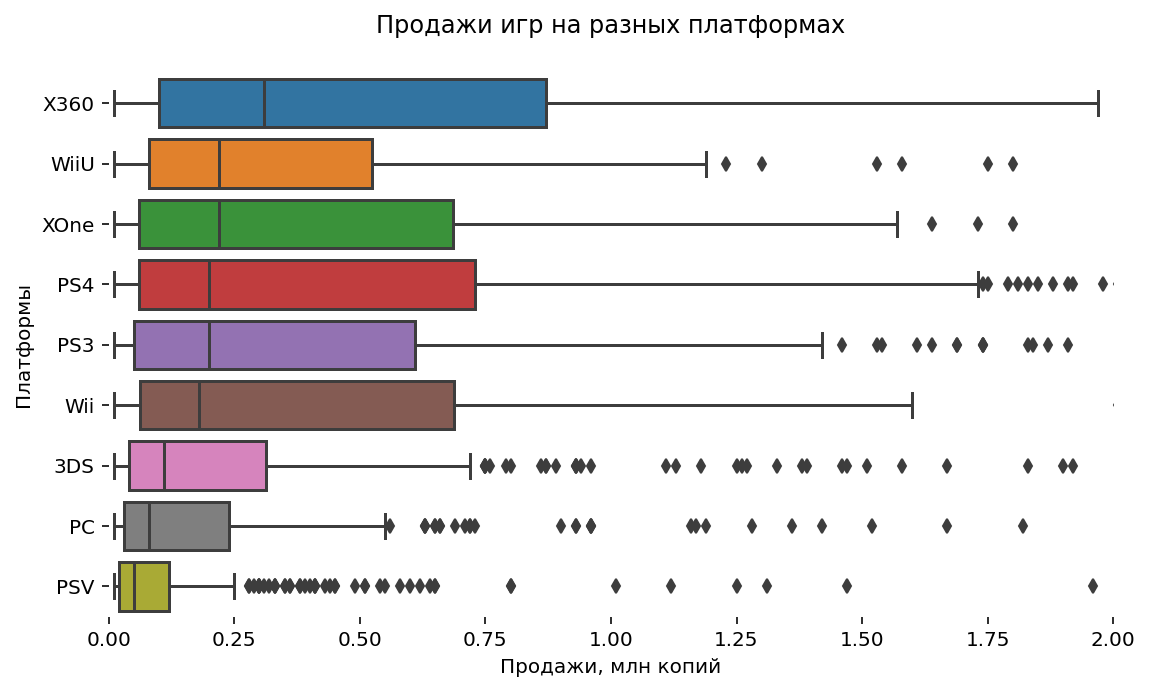

In [63]:
plt.figure(figsize=(9, 5))

(sns.boxplot(data=analyse_data, 
             y='platform', 
             x=data['total_sales'],
             order=order)
     .set(title = 'Продажи игр на разных платформах\n', 
          ylabel = 'Платформы', 
          xlabel='Продажи, млн копий',
             xlim=(0, 2))
)
sns.despine(left=True, bottom=True) # уберем линии границ графика
plt.show()

- Визуализация статистических характеристик данных подтверждает, что платформы Wii, PS3 и X360 покидают рынок и их не стоит включать в список перспективных для выпуска новых игр. 
- XOne и PS4 выглядят наиболее перспективными для запуска новых игр.
- Низкое медианное значение количества распространённых копий PSV при полном охвате выбранного временного диапазона характреризует её как наименее перспективную из предложенного списка.
- Невысокие значения медианы продаж на платформах 3DS и PS4 характерны для недавнего старта на рынке.
- Низкое медианное значение количества проданных копий от PC характерно для игр этой платформы и может компенсироваться стабильным количеством релизов благодаря большему охвату.


### Влияние отзывов пользователей и критиков на продажи внутри одной платформы

Для оценки влияния рейтинга критиков и пользователей на продажи стоит рассмотреть корреляционные матрицы для каждой платформы и визуализировать их с помощью парных графиков распределения.

In [64]:
analyse_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,21.05,97.0,8.2,M
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,16.27,97.0,8.1,M
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,14.63,-1.0,-1.0,unknown
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,14.60,-1.0,-1.0,unknown
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,13.79,83.0,5.3,M


In [66]:
# напишем функцию, которая выделит необходимые столбцы для каждой платформы и выведет корреляционные данные по ним:
def rating_for_platform(platform):
# отберем актуальные данные по платформам:
    analyse_data_score = analyse_data.query('platform == @platform')
    print()
# зададим размер общей фигуры:
    fig = plt.figure(figsize=(14,5))
# подсчитаем коэффициент корреляции:
    k_corr = round(100*analyse_data_score[analyse_data_score['critic_score']!= -1]['critic_score'].corr(
        analyse_data_score[analyse_data_score['critic_score']!= -1]['total_sales']), 2)
# построим диаграмму рассеивания значений количества продаж по оценке критиков:
    ax2 = fig.add_subplot(121)
    ax2 = (sns.scatterplot(data=analyse_data_score[analyse_data_score['critic_score']!= -1], 
                           x='critic_score', 
                           y='total_sales')
               .set(title = 'Распределение количества продаж \n по оценкам критиков', 
                     xlabel = 'Оценка критиков,\n\n корреляция %.2f%%.' %k_corr, 
                     ylabel = 'Объем продаж, млн копий')
          )
# подсчитаем коэффициент корреляции: 
    k_corr = round(100*analyse_data_score[analyse_data_score['user_score']!= -1]['user_score'].corr(
        analyse_data_score[analyse_data_score['user_score']!= -1]['total_sales']*100), 2)   
# построим диаграмму рассеивания значений количества продаж по оценке пользователей:
    ax2 = fig.add_subplot(122)
    ax2 = (sns.scatterplot(data=analyse_data_score[analyse_data_score['user_score']!= -1], 
                           x='user_score', 
                           y='total_sales')
               .set(title = 'Распределение количества продаж \n по оценкам пользователей', 
                     xlabel = 'Оценка пользователей,\n\n корреляция %.2f%%.' %k_corr,
                     ylabel = 'Объем продаж, млн копий')
    )
# выведем результат:
    plt.show()

Влияние отзывов на продажи платформы XOne



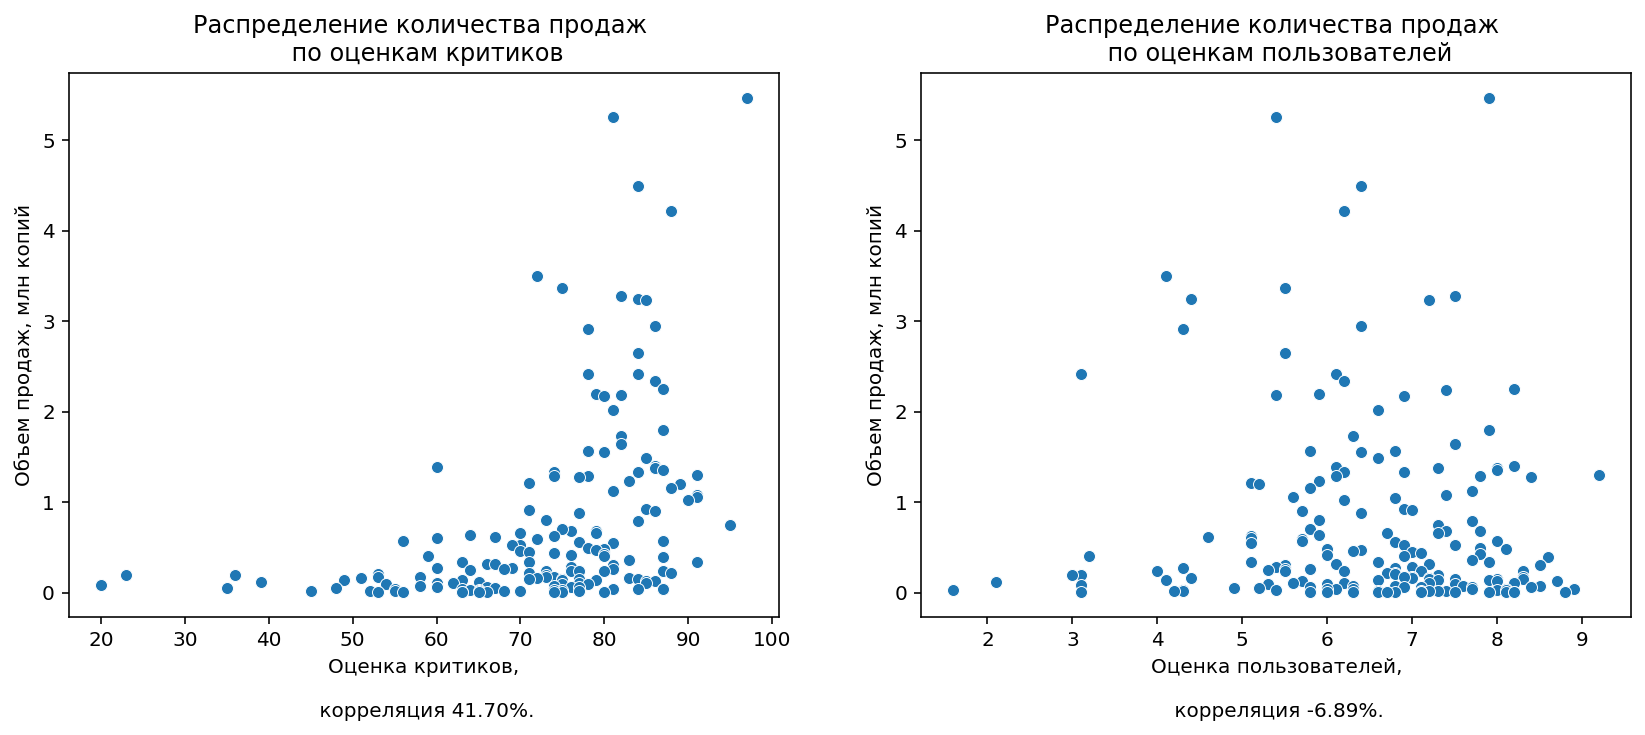

Влияние отзывов на продажи платформы PS4



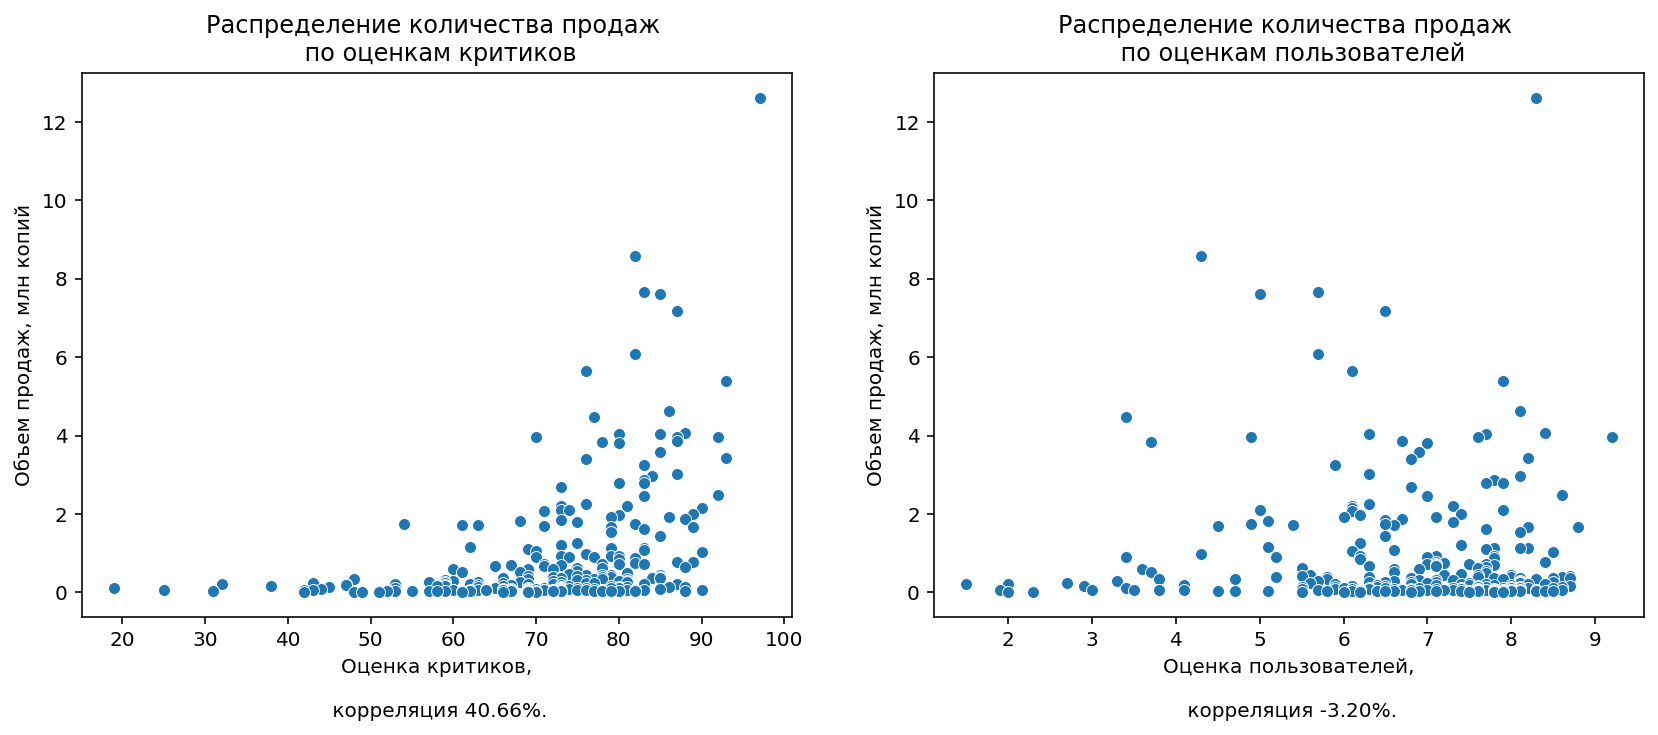

Влияние отзывов на продажи платформы 3DS



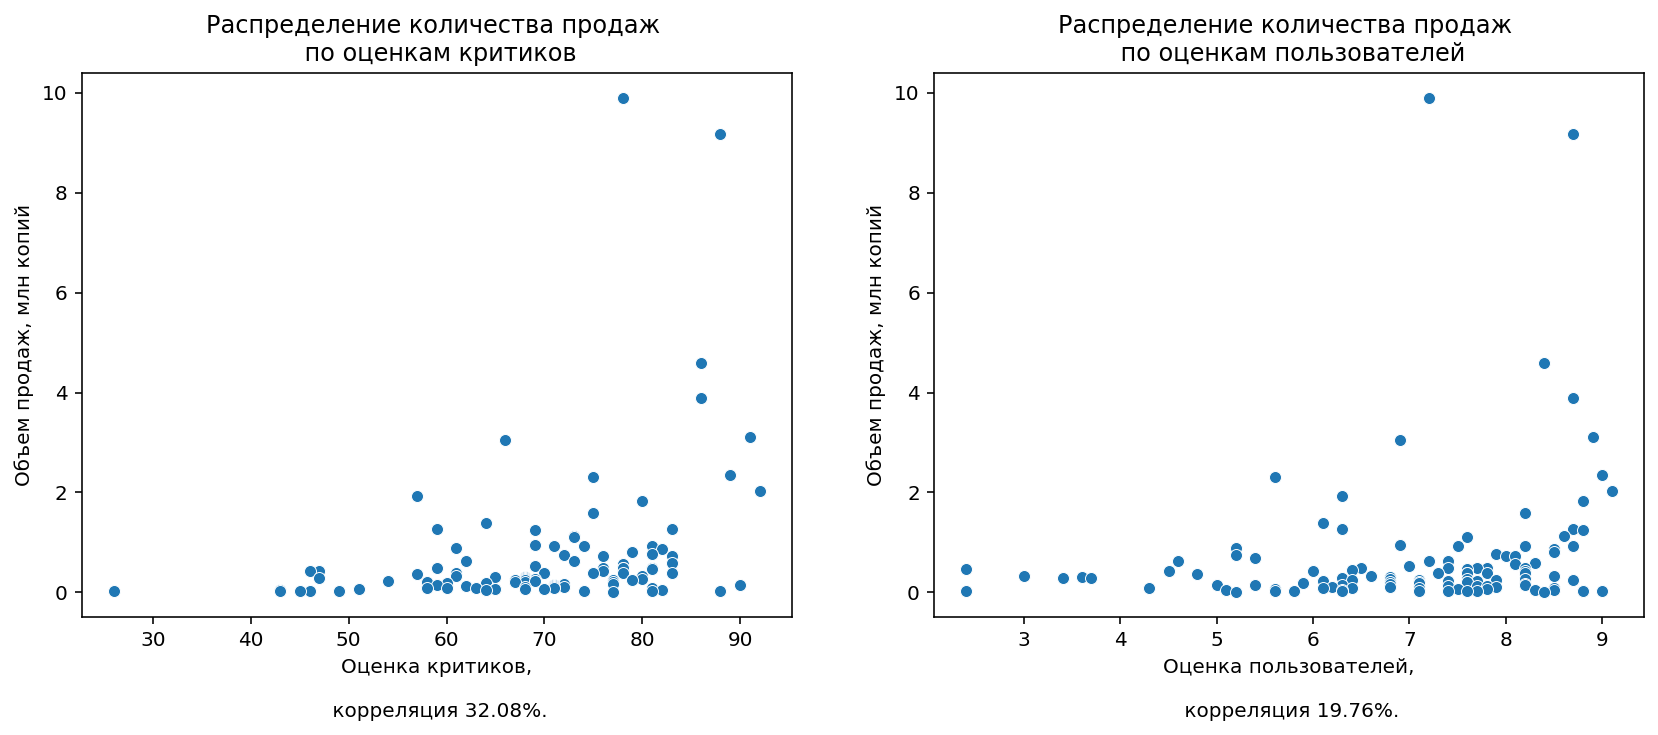

Влияние отзывов на продажи платформы WiiU



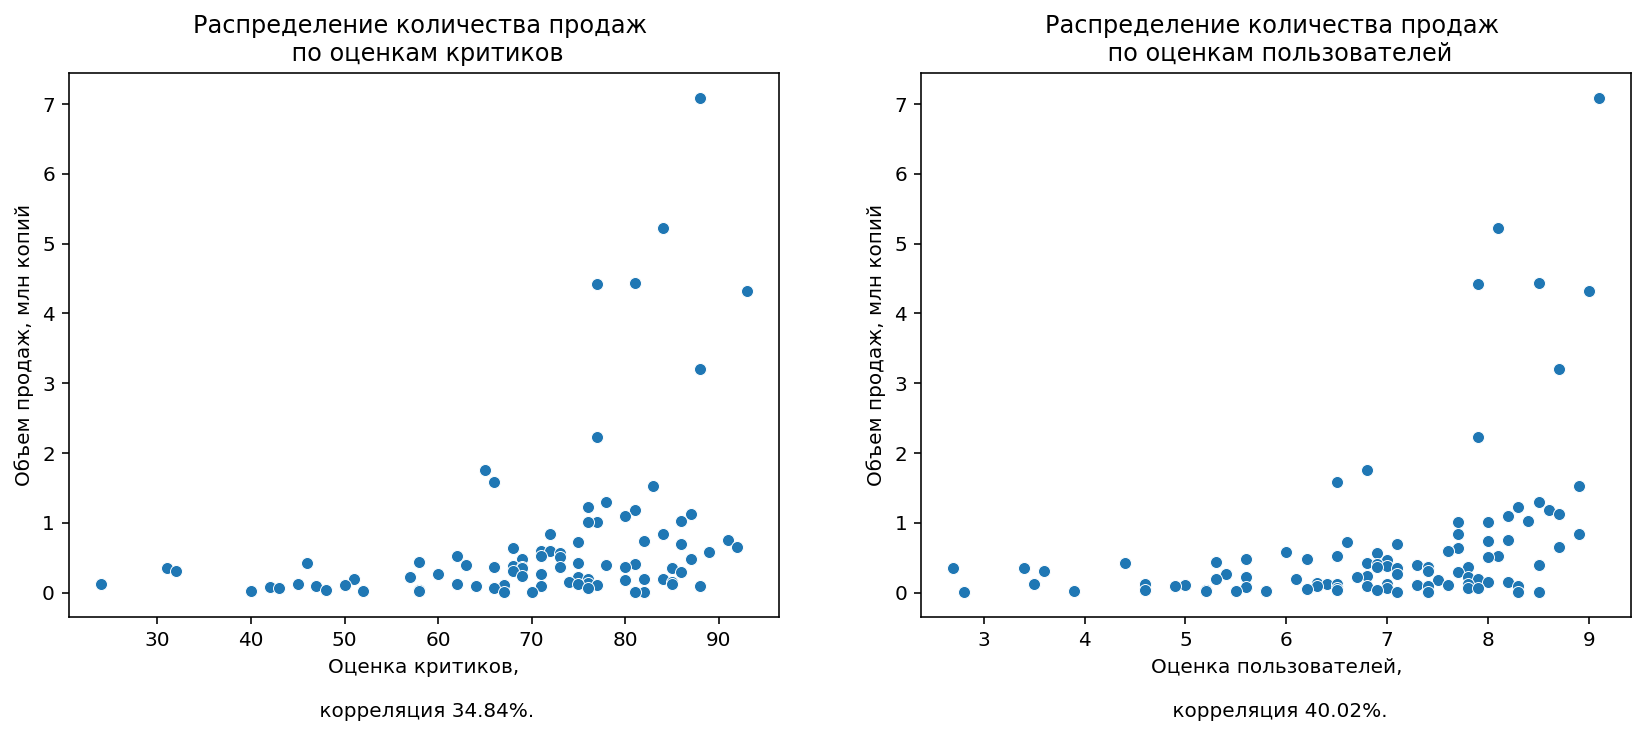

Влияние отзывов на продажи платформы PC



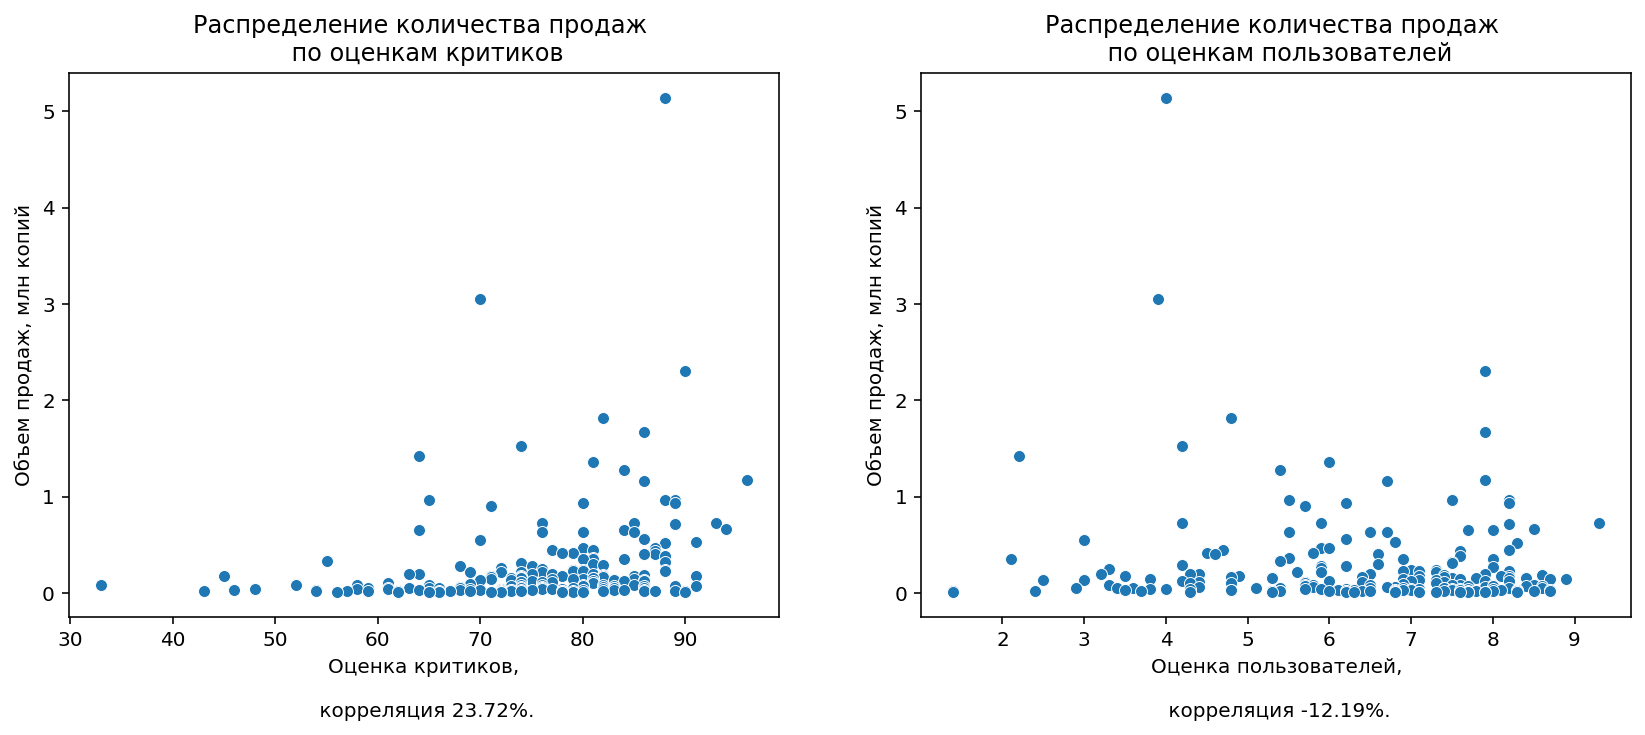

In [67]:
# осавим для анализа только выбранные ранее платформы:
actual_name_platform = ['XOne', 'PS4', '3DS','WiiU', 'PC']
# построим графики для каждой из них:
for platform in actual_name_platform:
    print('Влияние отзывов на продажи платформы ' + platform)
    rating_for_platform(platform)
    plt.show()

- Наибольшее влияние пользовательских оценок на продажи можно отметить у WiiU (40,02%) и 3DS(19,76%). В остальных случаях оно значительно меньше.
- Коэффициент корреляции оценки критиков для всех платформ выше КК оценки пользователей, однако сам посебе сравнительно не высок и говорит об умеренном влиянии оценки критиков на продажи игр на каждой платформе. Исключением стала лишь платформа Wii, где наблюдается не только существенное влияние оценки критиков (34,84%), но и большее влияние оценки пользователей на продажи, чем оценки критиков;
- Игры в высокими значениями продаж отмечены преимущественно высокими оценками критиков, в то время как оценка пользователей этих игр может быть низкой или средней.

### Оценка распределения игр по жанрам.

Все игры делятся не только на принадлежность к той или иной платформе, но и на жанры. 

Для рассмотрения влияния принадлежности к конкретному жанру следует изучить многочисленность и прибыльность каждого из них.

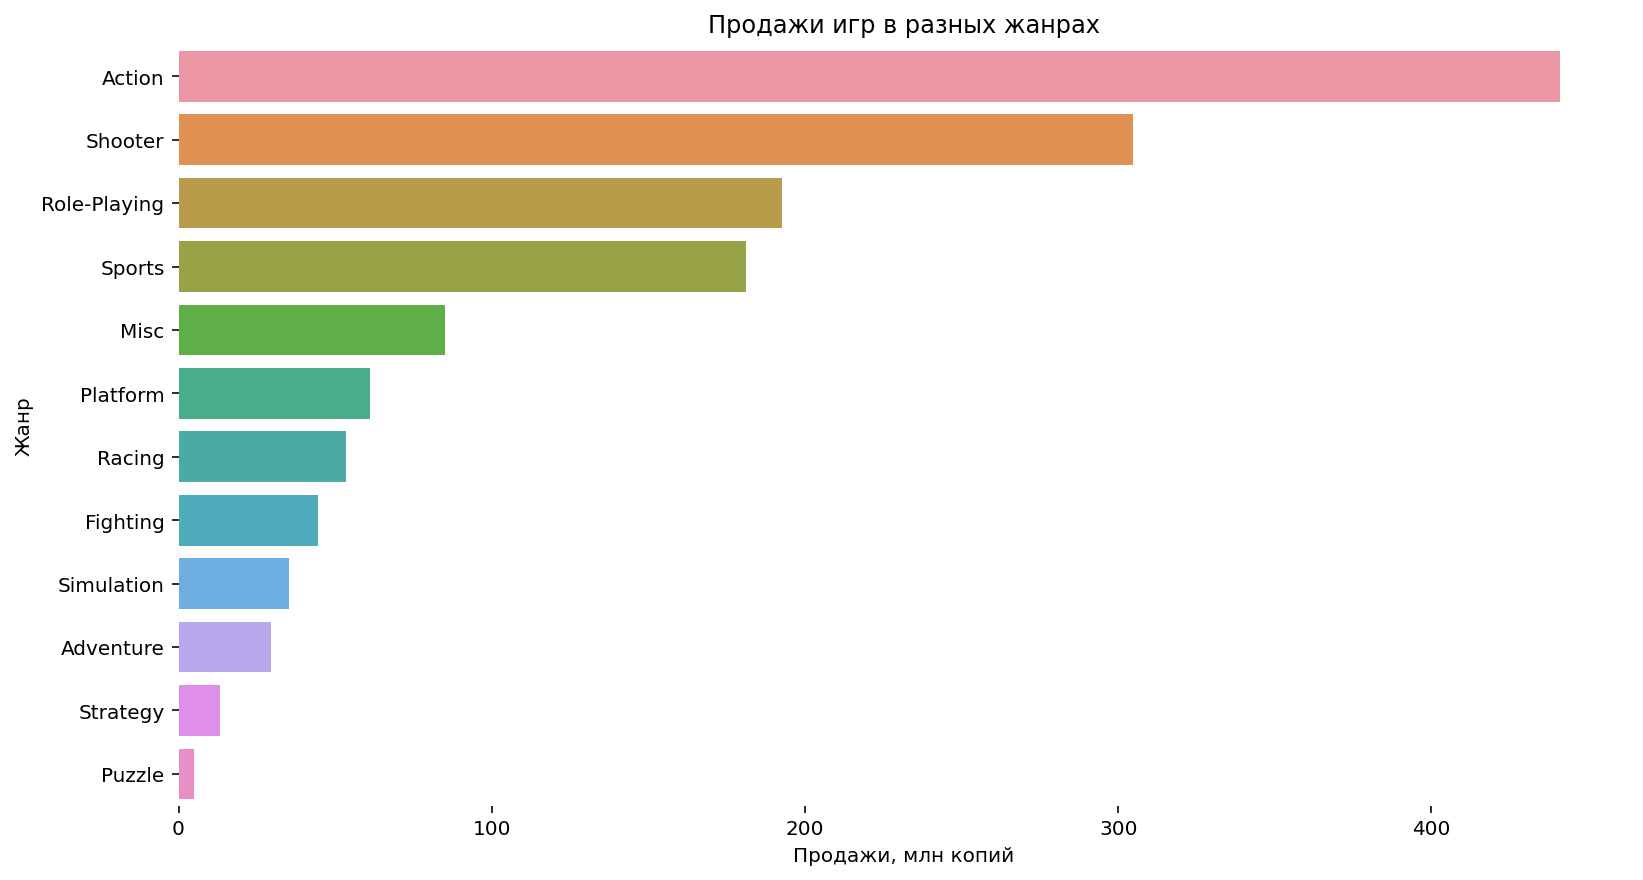

In [68]:
# сгруппируем сводную таблицу актуальных продаж по имеющимся жанрам:
genre_data = pd.pivot_table(analyse_data, 
                            index=['genre'], 
                            values='total_sales', 
                            aggfunc='sum').sort_values(by='total_sales', ascending=False)
# визуализируем количество реализованных копий по жанру:
plt.figure(figsize=(13, 7))
(sns.barplot(data = genre_data, 
             x = 'total_sales', 
             y = genre_data.index, 
             orient='h')
        .set(title = ('Продажи игр в разных жанрах'), 
             xlabel = 'Продажи, млн копий', 
             ylabel = 'Жанр')
)
sns.despine(left=True, bottom=True)

plt.show()

Наиболее распространёнными в исследуемом периоде оказались Action и Shooter, после примерно с равным количеством проданных копий оказались Role-Plaing и Sport. Рассмотрим средние и медианные значения количества продаж, так как среди каждого жанра могут быть выбросы "топ-игр", которые продавались большим количеством копий.

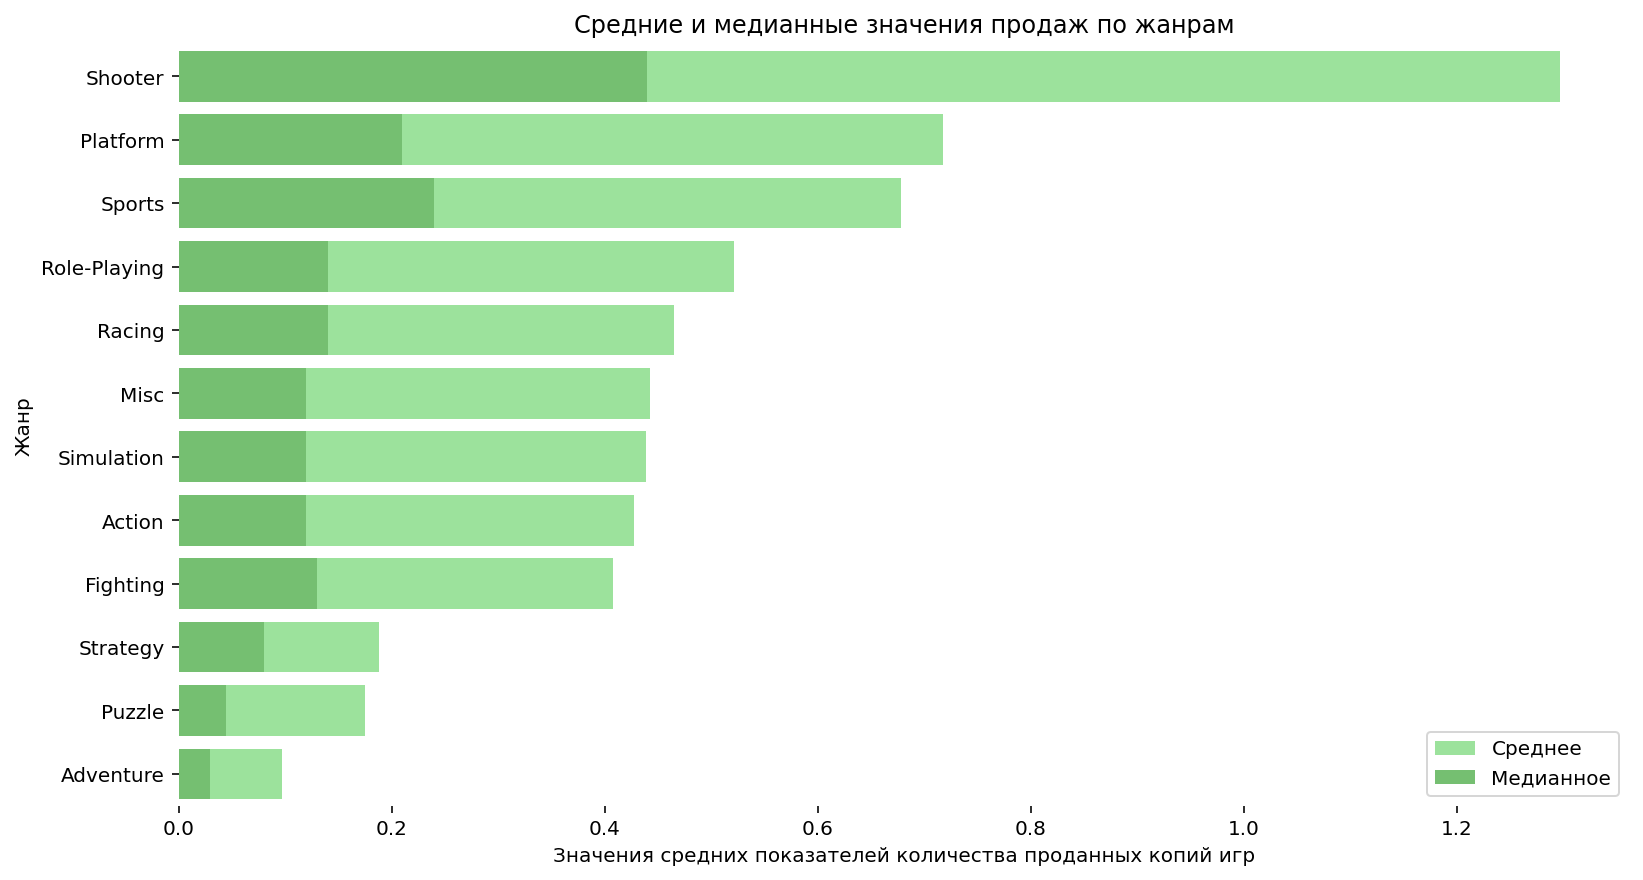

In [69]:
# создадим сводную таблицу с медианными и средними значениями количества проданных копий в каждом жанре:
genre_data = pd.pivot_table(analyse_data, 
                            index=['genre'], 
                            values='total_sales', 
                            aggfunc=['mean', 'median']).reset_index()
# сбросим названия столбцов для избавления от мультииндекса:
genre_data.columns = ["_".join(col) for col in genre_data.columns]
# отсортируем данные:
genre_data = genre_data.sort_values(by='mean_total_sales', ascending=False)

plt.figure(figsize=(13, 7))
# визуализируем данные обоих показателей на одном графике для сравнения:
sns.barplot(x="mean_total_sales", 
            y="genre_", 
            data=genre_data,
            label="Среднее", 
            color='lightgreen')
sns.set_color_codes("muted")
(sns.barplot(x="median_total_sales", 
            y="genre_", 
            data=genre_data,
            label="Медианное", 
            color='g')
     .set( title = ('Средние и медианные значения продаж по жанрам'), 
            xlabel = 'Значения средних показателей количества проданных копий игр', 
            ylabel = 'Жанр',
            label=True)
)
plt.legend()
sns.despine(left=True, bottom=True)

plt.show()

Согласно данным средних и медианных значений количества продаж, наиболее популярными были Shooter, в то время как общая сумма проданных копий жанра Action существенно больше. Это как раз говорит о наличии в последнем "топовых" игр, которые увеличили общие показатели. Спортивные игры в средних показателях так же обошли ролевые. Интересно отметить, что жанр Platform, занимающий в рейтинге общих продаж 6 место, в показателях средних величин занимает второе по среднему и третье по медианному значению, что может говорить о малых количествах выбросов "топ-игр".

## Исследование продаж по регионам

В данных присутствует раздение продаж по регионам. Рассмотрим, какие платформы, жанры и игры лидировали в разных регионах по продажам копий.

In [70]:
# создадим функцию для визуализации количества проданных копий в каждом регионе в зависимости от выбранного параметра:
def analyse_region(parametr, parametr_title_name, parametr_name, parametr_name_pie):

# сгруппируем актуальную базу данных по параметру:
    data_region_sales = (analyse_data.groupby(parametr)
                                 .agg({'na_sales':'sum', 'eu_sales':'sum', 'jp_sales':'sum'})
                                 .sort_values(by='eu_sales', ascending=False)
                        )
    plt.figure(figsize=(13, 7))

# построим столбчатые диаграммы для каждого региона на одном графике:
    sns.barplot(y="na_sales", 
            x=data_region_sales.index, 
            data=data_region_sales,
            label="NA", 
            color='green')

    sns.barplot(y="eu_sales", 
            x=data_region_sales.index, 
            data=data_region_sales, alpha=0.7,
            estimator=sum,
            label="EU", 
            color='lightgreen')

    sns.barplot(y="jp_sales", 
            x=data_region_sales.index, 
            data=data_region_sales, estimator=sum, alpha=0.7,
            label="JP", 
            color='orange').set( title = ('Выручка от продаж в регионах NA, EU, JP по '+ parametr_title_name), 
                            ylabel = 'Выручка', 
                            xlabel = parametr_name)
    sns.despine(left=True, bottom=True)
    plt.legend()
    plt.show()
# построим для каждого региона круговые диаграммы с топ-5 ретинга каждого параметра:    
    regions = analyse_data.columns[4:7]
    fig, axs = plt.subplots(1, 3, figsize=(15, 5)) 
    fig.suptitle('ТОП-5 '+ parametr_name_pie + ' в регионах')
   
    for i in range(len(regions)):
         # для каждого региона сгруппируем данные по параметру:
        data_i = (analyse_data.groupby(parametr)[regions[i]]
                        .sum()
                        .reset_index()
                        .sort_values(regions[i], ascending = False, ignore_index = True)
                        .head(5))
        # зададим цветовую палитру:
        colors = ( "orange", "lightblue", "coral", "seagreen", "pink", "grey" )
# из-за разного количества значенпий параметра напишем два варианта создания топ-5 и "Other" для диаграммы во избежания ошибки:
        try:
            data_i_other = data_i.append({parametr: 'Other', 
                                          regions[i]: analyse_data[regions[i]].sum() - data_i[regions[i]].sum()}, 
                                         ignore_index= True)
            axs[i].pie(data_i_other[regions[i]], 
                       labels = data_i_other[parametr], 
                       startangle=90, 
                       colors=colors, 
                       autopct='%1.1f%%')
        except:
            axs[i].pie(data_i[regions[i]], 
                       labels = data_i[parametr], 
                       startangle=90, 
                       colors=colors, 
                       autopct='%1.1f%%')
        # выделим название региона для подписи диаграммы:    
        axs[i].set_title(data_i.columns[1].split('_')[0].upper())

    plt.show()

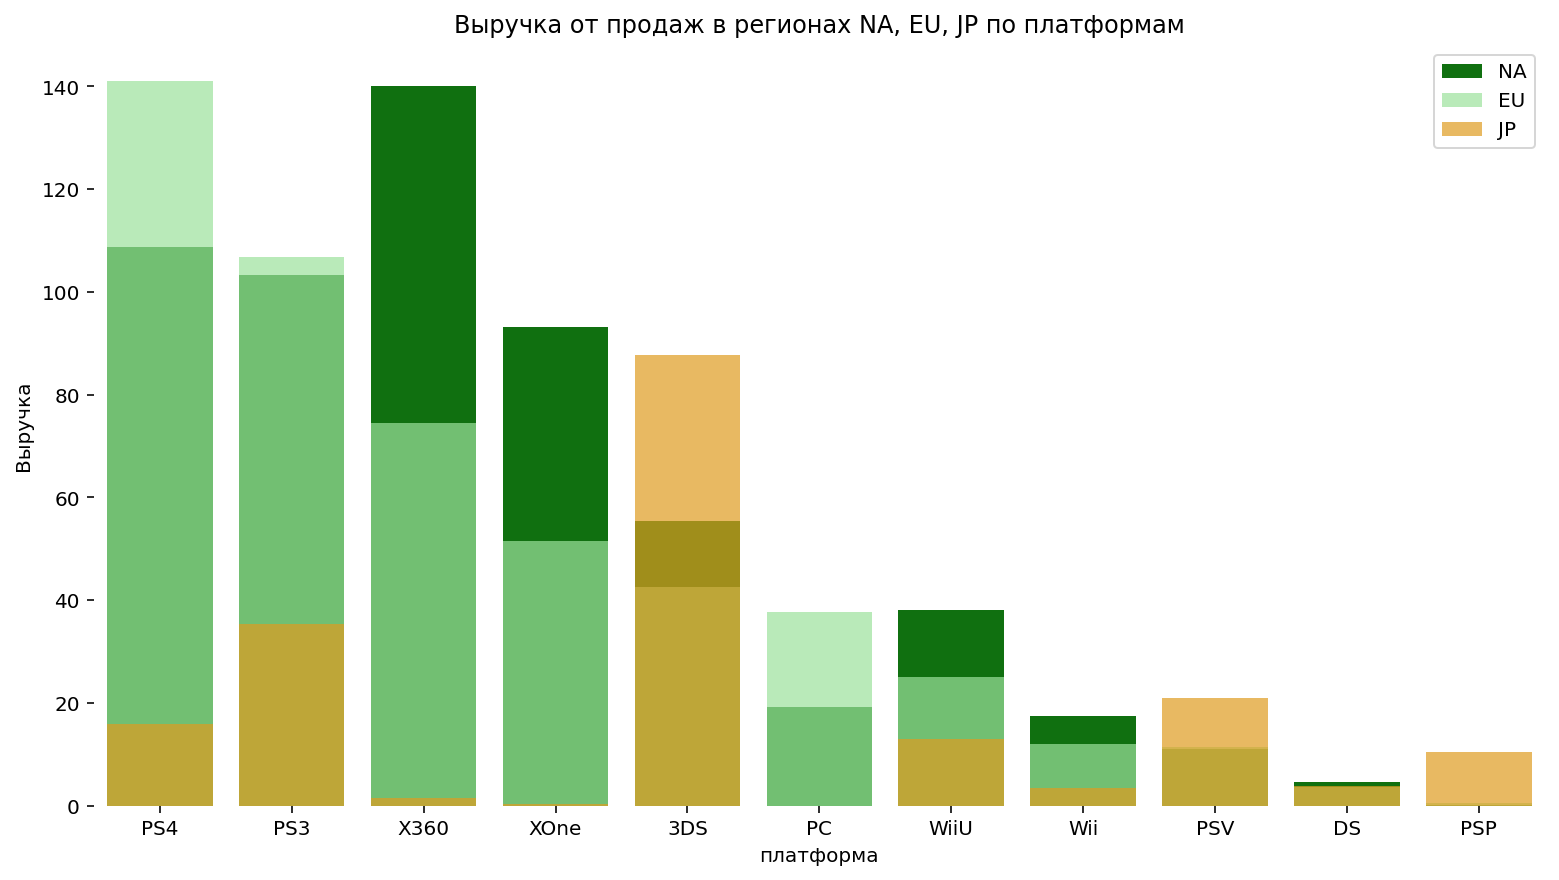

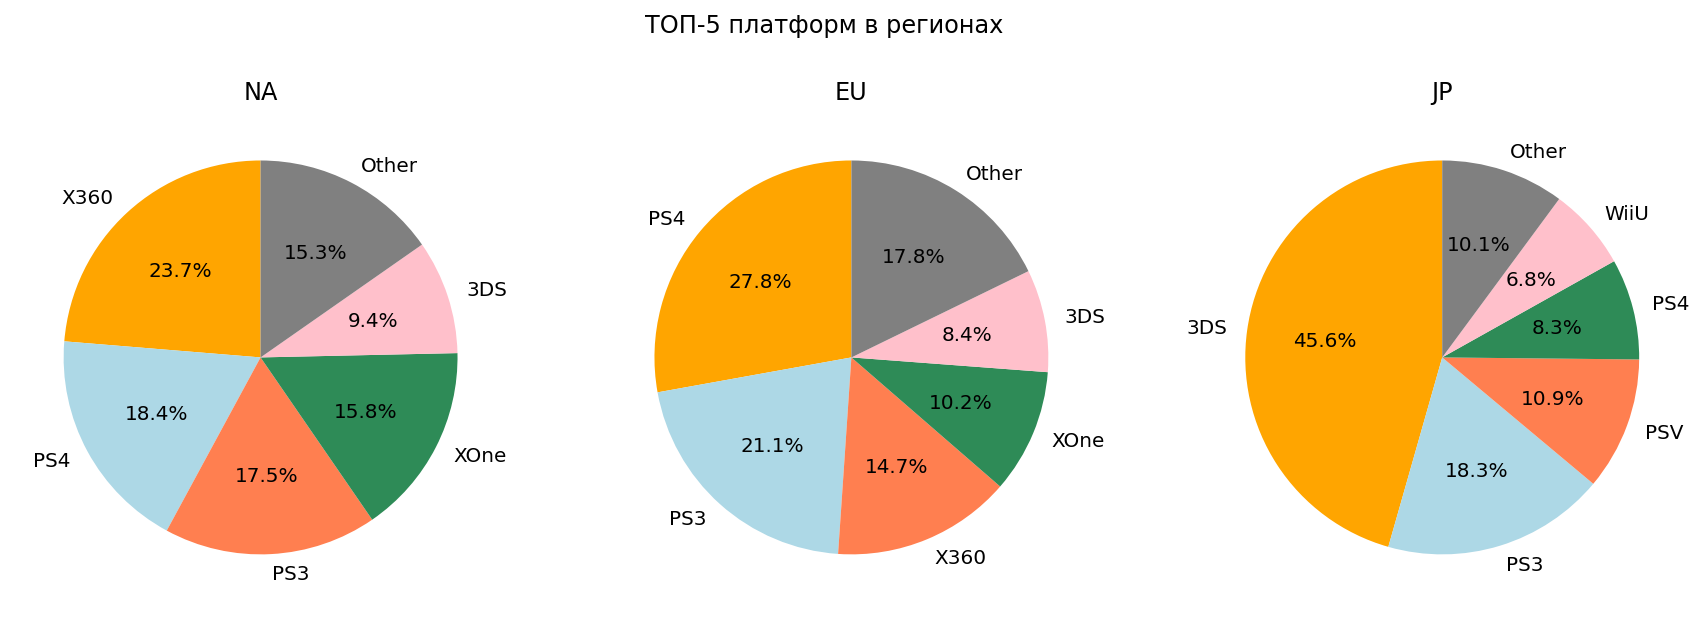

In [71]:
analyse_region('platform', 'платформам', 'платформа', 'платформ')

- Максимальную долю проданных копий в Америке составляют игры для PlayStation и XBox. Уходящие PS3 и X360 уступают место своим новым версиям PS4 и XOne. Отдельно завоёвывает рынок 3DS, единаственная актуальная портативная консоль. Остальные консоли суммарно не набирают и 15%.
- На европейском рынке лидеры те же, однако интерес к другим консолям немного выше - 17,1%.
- Японский рынок принципиально отличесается от остальных: предпочтение отдается не стационарным, а портативным консолям, поэтому на новую 3DS от Nintendo приходится почти половина продаж (45,6%), так же как на отстающую в других регионах PSV (10,9%) и совсем неактуальную для европейского и американского рынка WiiU (6,8%). Из стационарных консолей в рейтинг попали лишь PlayStation от Sony, совместно составившие 29,2%. Игры на PC также не актуальны в этом регионе.

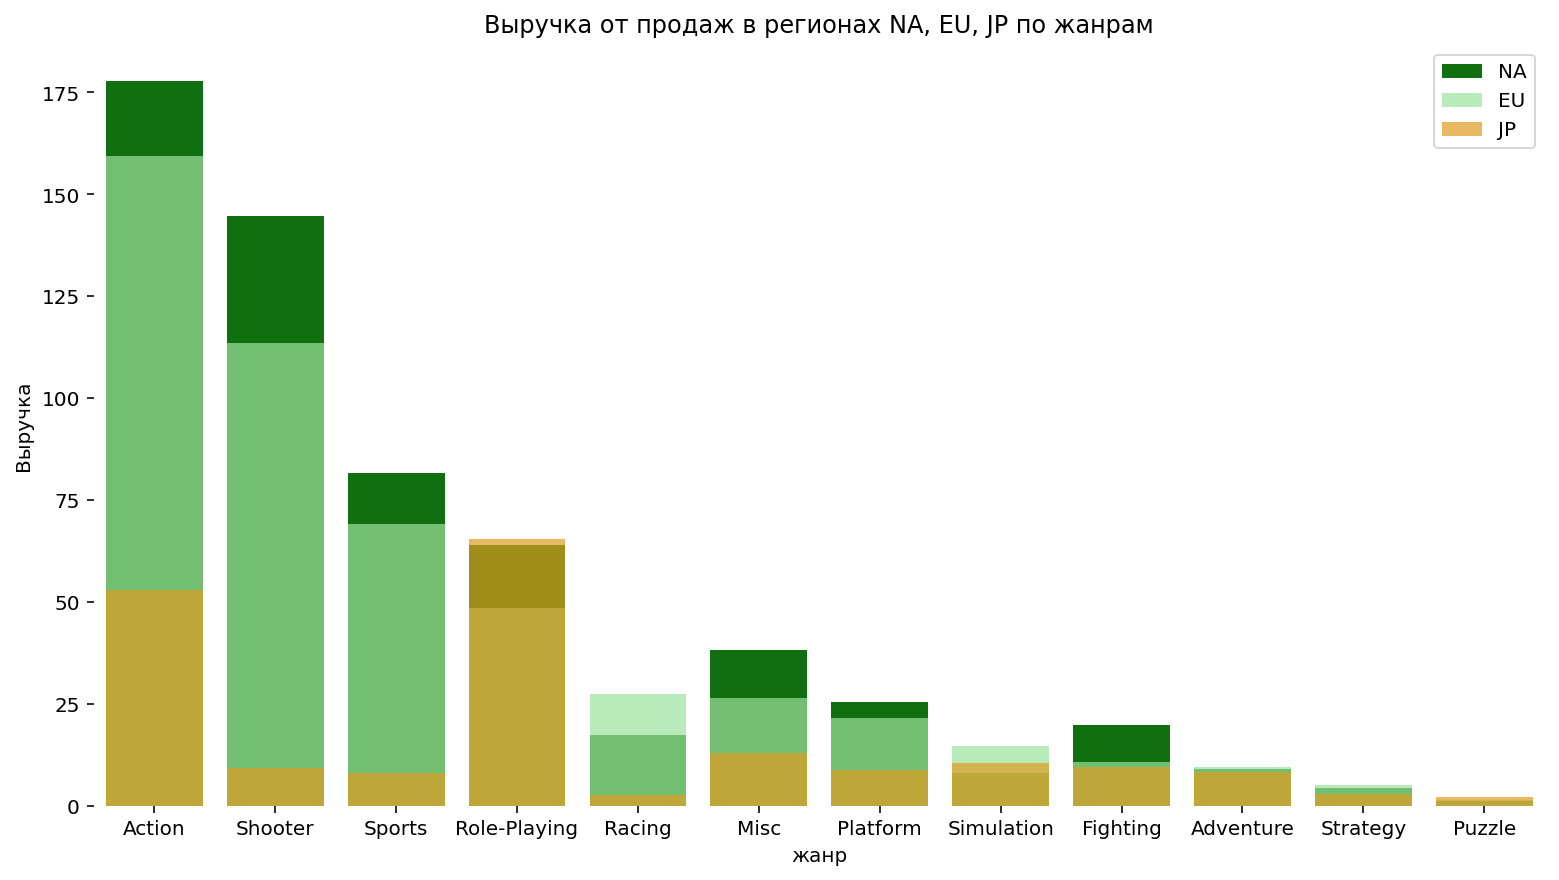

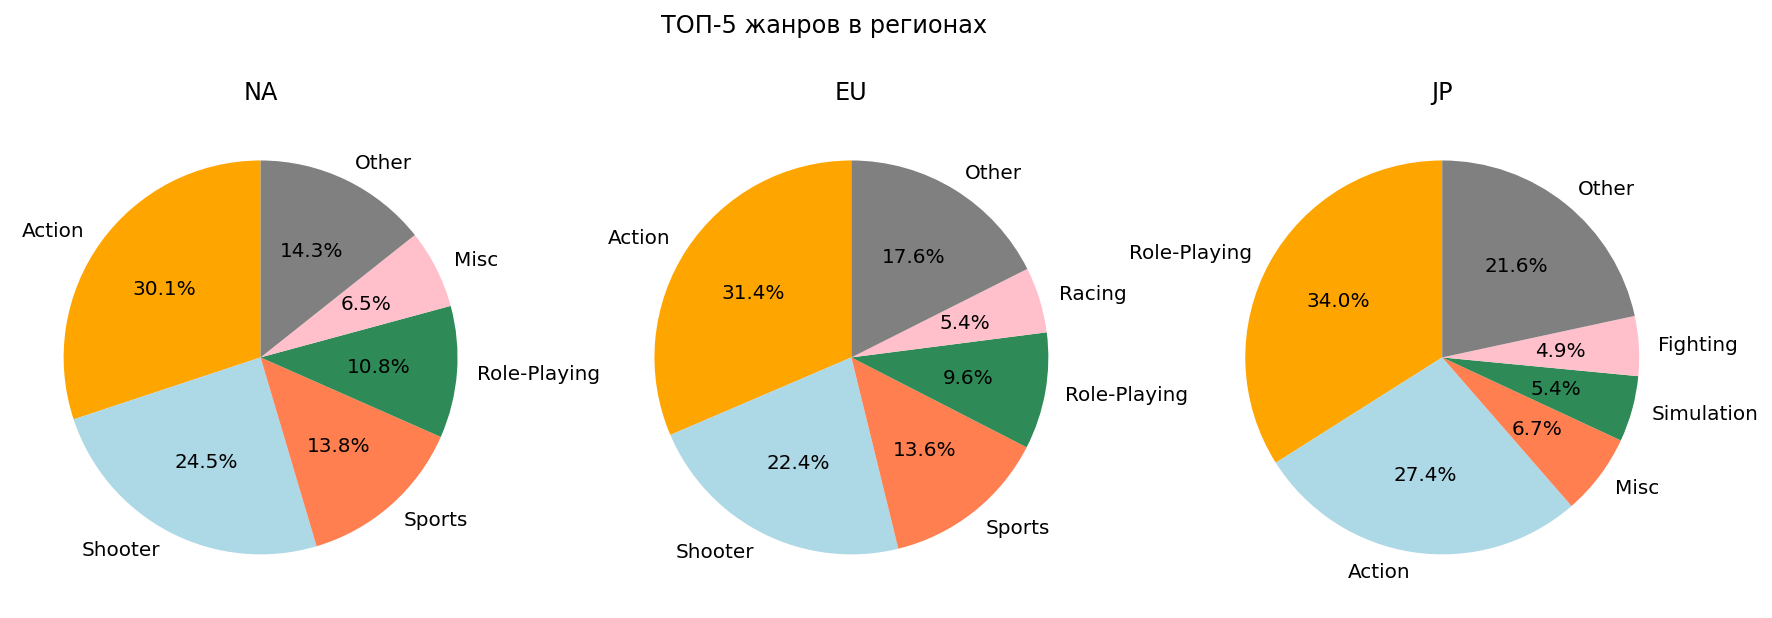

In [72]:
analyse_region('genre', 'жанрам', 'жанр', 'жанров')

- Жанровые рейтинги американского и европейского рынка очень схожи: Action занимет почти треть продаж, Shooter 22-25%, Sports почти 14%, Role-Plaing около 10%  и в обоих случаях доли примерно одинаковые. Основным отличием стали пятые места рейтинга, на которых в Америке установлены Misc, а в Европе Racing. 
- Принципаильно иную картину имеет топ-5 жанров в Японии: наибольшими продажами выделяется жанр Role-Plaing (34,0%). Action распространён почти так же как и в других регионах (27,4%). Третьим стал Misc, доля продаж которого на рынке составила около 7%, что немногим больше его доли рынка в Америке. Четвёртым стали игры-симуляции, а замыкает рейтинг Shooter с 4,9% доли продаж. Так же на рынке Японии игры, не попавшие в рейтинг имеют наибольшую долю среди остальных, что говорит о разнообразном интересе к жанрам в этом регионе.

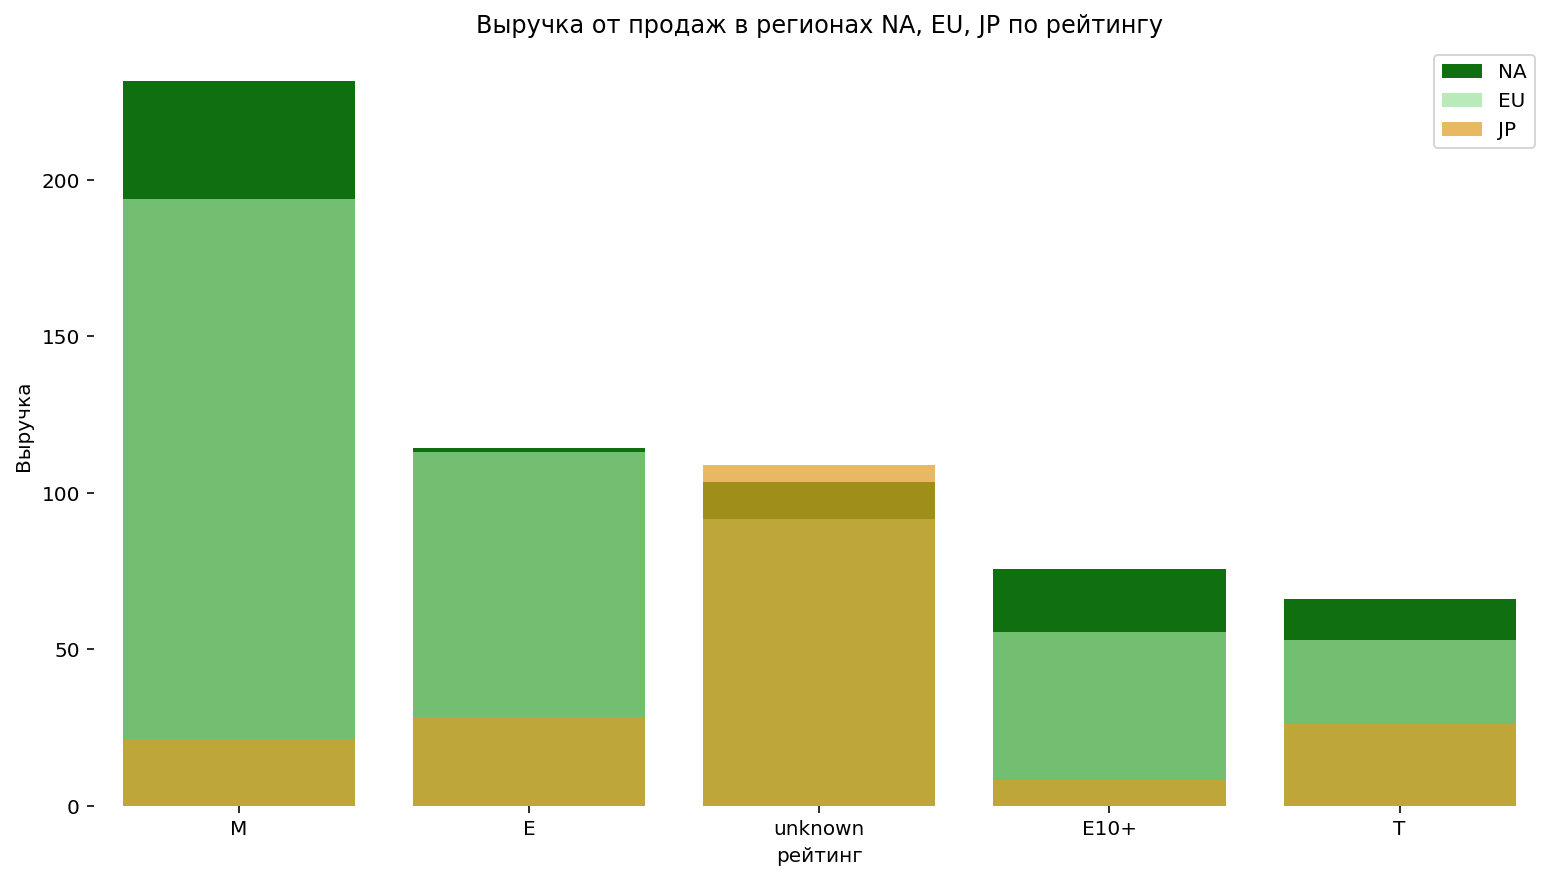

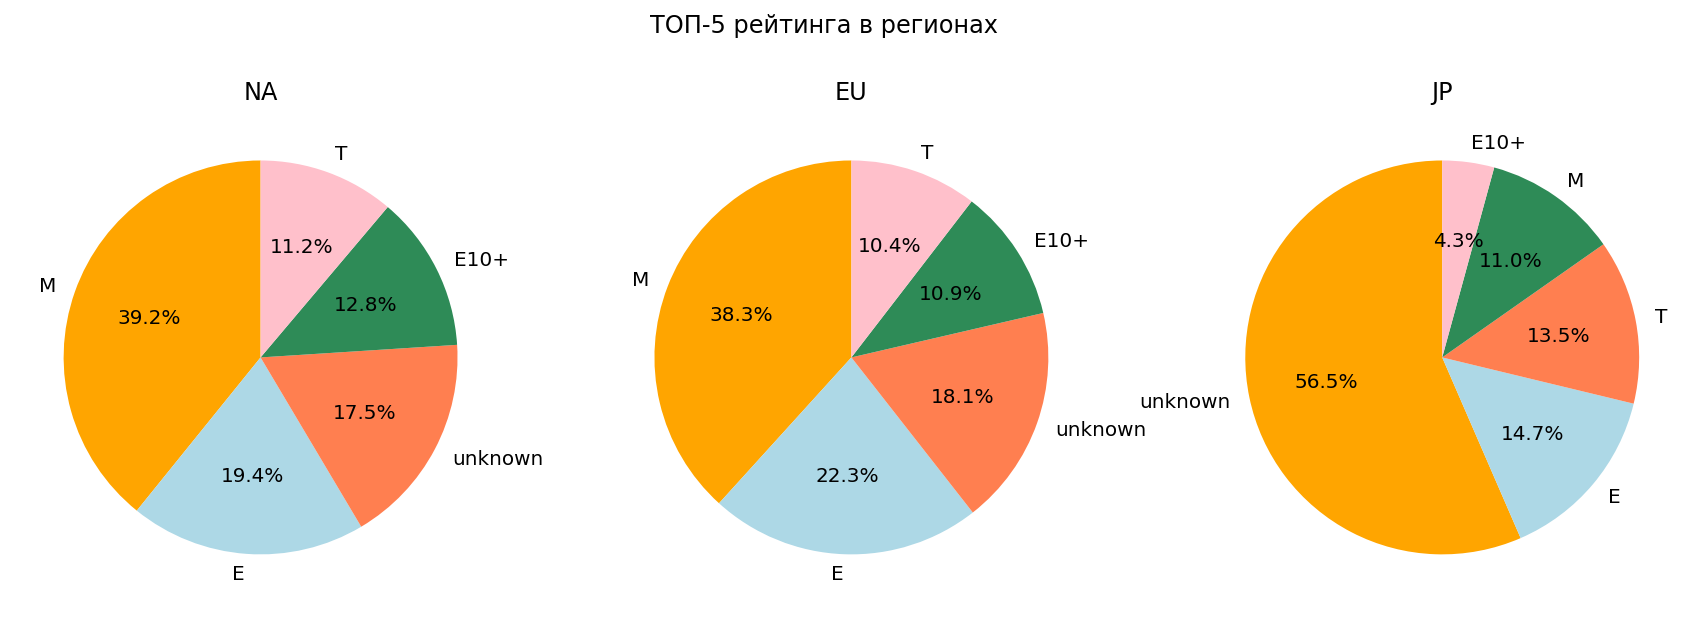

In [73]:
analyse_region('rating', 'рейтингу', 'рейтинг', 'рейтинга')

- Рейтинг от организации ESRB, устанавливающий возрастной ценз игр, в европейском и американском регионах расперделен идентично. 
Около 39% занимают игры категории "М" (для лиц старше 17 лет), около 20% игр составила категория "Е" (для всех возрастных категорий), чуть более 17% игр неопределенной категории и 21-24% "Е10+" и "Т" (игры для детей старше 10 и 13 лет).

- Японский рынок снова сильно отличается от других регионов. Там преобладают игры, категория которых не определена ESRB, так как возможно они не попадают в охват этой компании. Игры для всех возрастных категорий и для подростков старше 13 лет занимают почти равную долю рынка в 14,7% и 13,5%. Игры для взрослых чуть менее распространены и составили 11,0% продаж. Наименее популярны игры для детей старше 10 - их всего 4,3%.

## Проверка гипотез о рейтинге

Гипотезы:
 - средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
 - средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
 
 
 ### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
 Сформулируем нулевую и альтернативную гипотезы:
 
**H0**  Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

**H1**  Средние пользовательские рейтинги платформ Xbox One и PC различаются.


In [74]:
# напишем функцию, которая по условию выберет данные пользовательского рейтинга и выведет статистические параметры этих данных:
def describe(parametr, parametr_name):
    print('Статистические параметры данных пользовательского рейтинга '+parametr_name)
    print( )
    data_parametr = analyse_data.loc[(analyse_data[parametr]==parametr_name)&(analyse_data['user_score'] != -1)]
    print(data_parametr['user_score'].describe())
    data_parametr['user_score'].hist()
    plt.xlabel('Рейтинг')
    plt.ylabel('Количество игр')
    plt.title('Распределение количества игр по рейтингу\n')

    plt.show()

Статистические параметры данных пользовательского рейтинга XOne

count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64


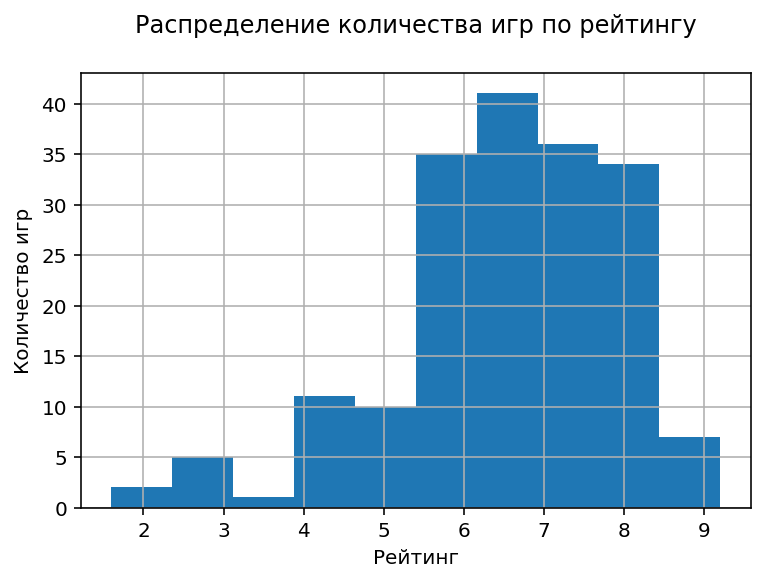

In [75]:
# проверим данные платформы XOne:
describe('platform' ,'XOne')

Статистические параметры данных пользовательского рейтинга PC

count    206.000000
mean       6.428641
std        1.664465
min        1.400000
25%        5.500000
50%        6.800000
75%        7.700000
max        9.300000
Name: user_score, dtype: float64


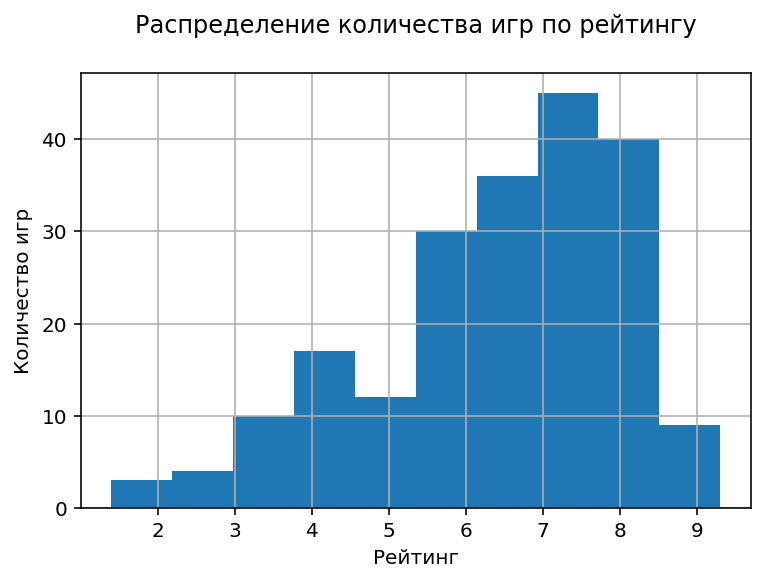

In [76]:
# проверим данные платформы PC:
describe('platform', 'PC')

В ходе анализа выделенных данных было выявлено, что данные имеют нормальное распределение, выборки достаточны (>30 наблюдений), что удовлетворяет требованию нормальности исходных значенийю Для проверки гипотез можно применить статистические методы анализа и t-критерий Стьюдента. Коэффициент alpha зададим 0.01 и будем оценивать величину уровня значимости p-value.

In [77]:
results = st.ttest_ind(analyse_data.query('(platform == "XOne")&(user_score != -1)')['user_score'], 
                        analyse_data.query('(platform == "PC")&(user_score != -1)')['user_score'], 
                        equal_var=False)

alpha = 0.01
print('Значение р-value:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Значение р-value: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


**Высокий показатель р-value говорит о том, что статистически средние показатели пользовательских рейтингов платформ XOne и PC значимо не отличаются.**



 ### Средние пользовательские рейтинги жанров Action и Sports разные.
 Сформулируем гипотезы
 
 **Н0**  Средние пользовательские рейтинги жанров Action и Sports одинаковые.

**Н1**  Средние пользовательские рейтинги жанров Action и Sports различаются.

Статистические параметры данных пользовательского рейтинга Action

count    523.000000
mean       6.825048
std        1.374440
min        1.600000
25%        6.250000
50%        7.100000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64


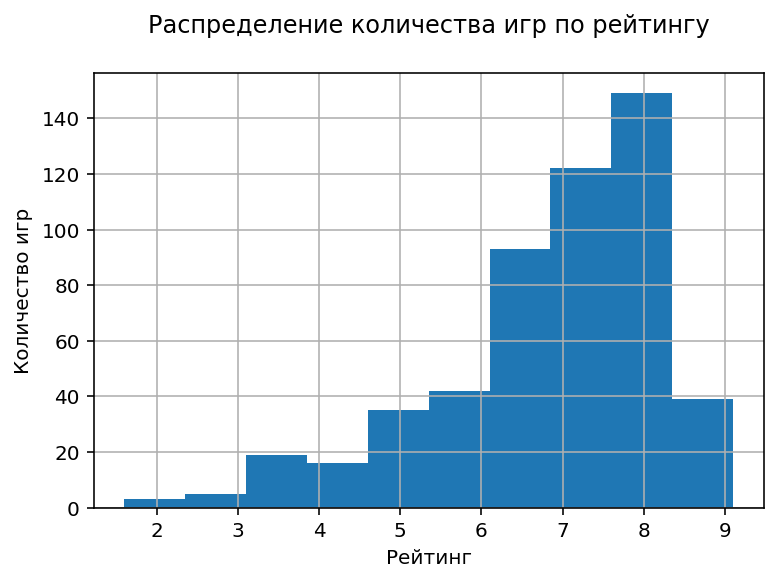

In [78]:
# проверим данные жанра Action:
describe('genre', 'Action')

Статистические параметры данных пользовательского рейтинга Sports

count    194.000000
mean       5.455670
std        1.743142
min        0.200000
25%        4.300000
50%        5.750000
75%        6.800000
max        8.800000
Name: user_score, dtype: float64


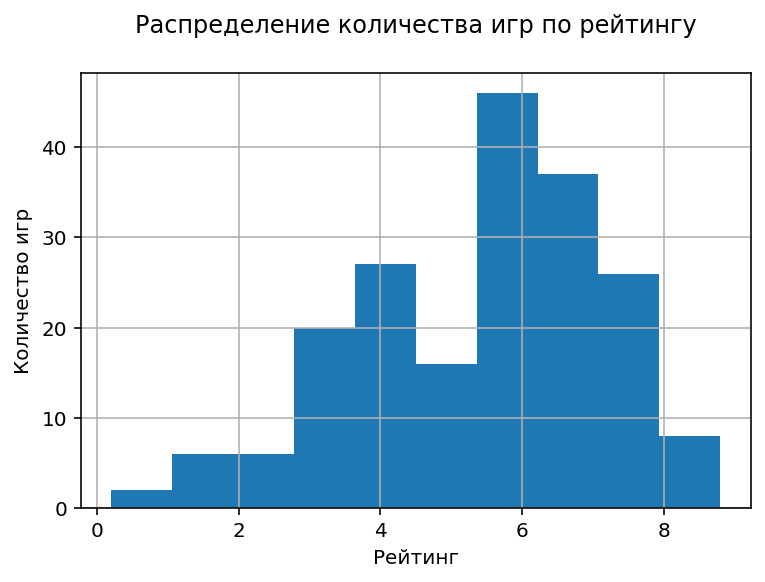

In [79]:
# проверим данные жанра Sports:
describe('genre', 'Sports')

In [80]:
results = st.ttest_ind(analyse_data.query('(genre == "Action")&(user_score != -1)')['user_score'], 
                        analyse_data.query('(genre == "Sports")&(user_score != -1)')['user_score'], 
                        equal_var=False)

alpha = 0.01
print('Значение р-value:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Значение р-value: 5.989458066467418e-20
Отвергаем нулевую гипотезу


**Очень маленькое значение р-value говорит о том, что на имеющихся данных, на уровне значимости 1% есть основания отвергнуть нулевую гипотезу о равенстве средних значений пользовательских рейтингов (отзывов) жанров Action и Sports в пользу альтернативной гипотезы.**

**Вывод**

Исходя из необходимости проанализировать количественные данные оценок пользователей двух платформ и двух жанров и нормальности распределения пользовательских оценок было решено воспользоваться методом Т-теста и сравнивать средние значения выборок (платформ или жанров). В случае сравнения двух независимых выборок в качестве нулевой гипотезы берется отсутствие статистических различий, то есть средние значения равны. В качестве критерия проверки гипотезы будет использоваться пороговое значение доверительного уровня значимости альфа равное 0,1, которое было выбрано из стандартных вариантов и сооветствует стандартному отклонению около 1,65 и вычислениям, не требующим особой точности.

- При сравнении средних пользовательских оценок двух популярных платформ XOne и PC не получилось отвергнуть нулевую гипотезу, что говорит о том, что статистические закономерности одинаковы и средние пользовательские рейтинги значимо не различаются.

- При сравнении средних пользовательских оценок жанров Action и Sports были выявлены значимые различия и нулевая гипотеза о равенстве показателей должна быть отвергнута в пользу альтернативной.

## Вывод

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников взяты доступные исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо предоставить принцип работы с данными для планирования стратегии компании на следующий год.

Задачей проведённого анализа было обработать имеющиеся данные и сформировать схему предобработки данных для дальнейшего анализа, выявить определяющие успешность игры закономерности, чтобы сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

- Описание данных

Данные представлены до 2016 года. Исследование проводится на декабрь 2016 г., планируется кампания на 2017 г. В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. Данные предоставлены в виде csv-файла со следующими параметрами каждой игры: Name (название игры), Platform (платформа) Year_of_Release — год выпуска Genre — жанр игры NA_sales — продажи в Северной Америке (миллионы проданных копий) EU_sales — продажи в Европе (миллионы проданных копий) JP_sales — продажи в Японии (миллионы проданных копий) Other_sales — продажи в других странах (миллионы проданных копий) Critic_Score — оценка критиков (максимум 100) User_Score — оценка пользователей (максимум 10) Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию. Данные за 2016 год могут быть неполными.

На этапе предварительной обработки данных было сделано:

- Изначальное написание названий столбцов не ссответстсвовало snake_case из-за написания с заглавной буквы, что было исправлено приведением всех названий к нижнему регистру.
- Данные с пропусками названий игр составили 0,01% и были удалены.
- Пропуски года релиза были частично заполнены из названий, оставшиеся 1,52% были удалены.
- Пропуски оценок критиков и оценок пользователей, в том числе значение 'tbd', были заменены значением-заглушкой.
- Причинами возникновения пропусков могло стать использование множества разрозненных источников, отсутствие данных в связи с давностью и непопулярностью игры или техническими ошибками при формировании базы данных.
- Столбцы с годом выпуска игры и рейтингом пользователей были переведены в тип int.
- В таблицу добавлен столбец суммарного значения продаж по всем регионам от каждой игры.
- Данные не содержали очевидные дубликаты, в ходе проверки совместной названий, платформ и года релиза был выявлен и удалён скрытый дубликат, скорее всего вызванный предзаказом, данные всех столбцов проверены правильность написания, ошибок не выявлено.

- В ходе исследовательского анализа данных был определён оптимальный временной интервал для прогнозирования продаж. Для выбора количества актуальных лет для исследования прогнозирования продаж на 2017 год стоит учесть резкое падение количества новых игр в 2012 году и среднее lifetime игровых консолей в 7 лет. Таким образом целесообразно отсечь данные старше 2012 года и проводить прогнозирование на интервале 4 полных лет (2012-2015гг) и 1 неполного (2016г).

Было выявлено, что временной интервал исследуемых данных - с 1980 года по 2016 год. 
До 1995 года игр выпускалось не много, но их количество проданных копий было существенным. С 1995 и по 2008 годы наблюдается скачкообразный рост количества выпускаемых игр и реализованных копий. 2008 и 2009 годы стали наиболее насыщены релизами и распространением, после чего в течение двух наблюдается плавный спад. Резкое падение количества предлагаемых новинок и соответствующий спад проданных копий приходится на 2012 год, за которым следует колебание рынка: в 2013, 2014 и 2015 количество новых игр медленно росло, но в 2016 снова упало даже ниже показателей 2002 года. 
Колебание количества проданных в мире копий в целом аналогично колебанию количества релизов, однако стоит отметить, что при увеличении количества игр с 2013 по 2014 распространение продолжало плавно снижаться и в 2016 году опустилась ниже уровня 1996 года. Это говорит о неполных данных за 2016 год.

На старте платформа в первые 1-2 года завоёвывает рынок и наращивает продажи, в последующие 2-4 года наблюдается пик релизов и продаж, дальнейшие года показатели идут на убыль и к десятому году достигают меньших, чем на старте уровней. Дальнейшие годы, если они есть, продажи игр на консоль минимальны. Это подтверждает статистические показатели активности консолей до 10 лет.



- Анализ уточнённых в актуальном временном интервале данных для выявления **наиболее актуальных и перспективных платформ** показал, что платформы Wii, PS3 и X360 покидают рынок и их не стоит включать в список перспективных для выпуска новых игр. Низкое медианное значение количества распространённых копий PSV при полном охвате выбранного временного диапазона характреризует её как наименее перспективную из предложенного списка. **XOne** и **PS4** выглядят наиболее перспективными для запуска новых игр в качестве стационарных платформ. Низкое медианное значение количества проданных копий от *PC* характерно для игр этой платформы и может компенсироваться стабильным количеством релизов благодаря большему охвату. Нестоит так же оставлять в стороне **3DS**, которая единственная представляет интерес среди портативных консолей.

- Анализ влияния оценок критиков и игроков на продажи копий в мире проводился по корреляционным матрицам и выявил, что коэффициент корреляции оценки критиков для всех платформ выше КК оценки пользователей, однако сам посебе сравнительно не высок и говорит об умеренном влиянии оценки критиков на продажи игр на каждой платформе. наиболее продаваемые игры отмечены высокими оценками критиков, в то время как оценку пользователей могут имень среднюю и ниже. За исключением PC на всех платформах оценки пользователей и оценки критиков между собой имеют скорее всего линейную зависимость и чаще всего соответствуют уровню друг друга.

- С точки зрения жанров, наиболее активными продажами в исследуемом периоде отметились Action и Shooter, после примерно с равным количеством проданных копий оказались Role-Plaing и Sport. Согласно данным средних и медианных значений количества продаж, наиболее популярными были Shooter. Эта разница может говорить о наличии в Action "топовых" игр, которые увеличили общие показатели. Спортивные игры в средних показателях так же обошли ролевые. Интересно отметить, что жанр Platform, занимающий в рейтинге общих продаж 6 место, в показателях средних величин занимает второе по среднему и третье по медианному значению, что может говорить о малых количествах выбросов "топ-игр".

Исследование продаж игр в разных регионах позволило собрать общий "портрет" пользователя.


 - Американские и европейские пользователи предпочитают : 
   - PS4 или XOne
   - Action и Shooter
   - игры для лиц старше 17 лет
   
   
 - Японские пользователи выббирают:
   - 3DS от Nintendo
   - Role-Plaing и Action
   - игры для всех категорий или не определённые рейтингом ESRB

Исходя из необходимости проанализировать количественные данные оценок пользователей двух платформ и двух жанров и нормальности распределения пользовательских оценок было решено воспользоваться методом Т-теста и сравнивать средние значения выборок (платформ или жанров). В случае сравнения двух независимых выборок в качестве нулевой гипотезы берется отсутствие статистических различий, то есть средние значения равны. В качестве критерия проверки гипотезы будет использоваться пороговое значение доверительного уровня значимости альфа равное 0,1, которое было выбрано из стандартных вариантов и сооветствует стандартному отклонению около 1,65 и вычислениям, не требующим особой точности.

- При сравнении средних пользовательских оценок двух популярных платформ XOne и PC не получилось отвергнуть нулевую гипотезу, что говорит о том, что статистические закономерности одинаковы и средние пользовательские рейтинги значимо не различаются.

- При сравнении средних пользовательских оценок жанров Action и Sports были выявлены значимые различия и нулевая гипотеза о равенстве показателей должна быть отвергнута в пользу альтернативной.

**Рекомендации:**

- выбирать для анализа и прогнозирования продаж данные не более, чем за последние 5 лет;
- выбирать приоритетными консоли с недавним стартом на рынке - на данный момент это XOne, PS4, WiiU. При условии выбора одной консоли отдать предпочтение платформе PS4, которая достаточно популярна во всех трёх регионах и сможет максимально охватить международный рынок;
- наибольшую аудиторию охватит игра в жанре Action, рекомендованная для любого возраста или для взрослых, наиболее стабильна для продаж станет Shooter с рейтингом М, особенно в американском и европейском регионах, а для японского региона предпочтительнее будет Role-Playing;
- при выборе конкретной игры для продвижения следует ориентироваться скорее на оценку критиков, нежели оценку пользователей.

In [81]:
# проверка:
print('Все ячейки работают, ошибок в коде нет.')

Все ячейки работают, ошибок в коде нет.
